### 1. 사용자 관절 33개 불러오기

In [5]:
# 필요한 라이브러리 호출
import cv2
import mediapipe as mp
import numpy as np

# 미디어파이프 도구 설정
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# 웹캠 피드 캡처 설정
cap = cv2.VideoCapture('video/shots1.mp4') # 숫자 0은 자신의 웹캠 카메라

# 미디어파이프 포즈 추정기 설정 - 각각 포즈 감지와 추적의 최소 신뢰도 설정
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
  # 반복문으로 웹캠에서 프레임 읽기
  while cap.isOpened():
    ret, frame = cap.read() # 프레임 읽기

    # 이미지 RGB로 변환 - 미디어파이프가 RGB 이미지를 사용
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    
    # 포즈 감지 수행
    results = pose.process(image)

    # 다시 BGR로 변환 - OpenCV가 BGR 이미지 사용
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # 검출된 랜드마크 그리기
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                              )
    
    # 이미지 원도우에 표시
    cv2.imshow('Mediapipe Feed', image)

    # ESC를 누르면 윈도우 종료
    if cv2.waitKey(1) & 0xFF == 27:
      break

# 리소스 해체
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [4]:
# 필요한 라이브러리 호출
import cv2
import mediapipe as mp
import numpy as np

# 미디어파이프 도구 설정
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# 웹캠 피드 캡처 설정
cap = cv2.VideoCapture(0) # 숫자 0은 자신의 웹캠 카메라

# 미디어파이프 포즈 추정기 설정 - 각각 포즈 감지와 추적의 최소 신뢰도 설정
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
  # 반복문으로 웹캠에서 프레임 읽기
  while cap.isOpened():
    ret, frame = cap.read() # 프레임 읽기

    # 이미지 RGB로 변환 - 미디어파이프가 RGB 이미지를 사용
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    
    # 포즈 감지 수행
    results = pose.process(image)

    # 다시 BGR로 변환 - OpenCV가 BGR 이미지 사용
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # 검출된 랜드마크 그리기
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                              )
    
    # 이미지 원도우에 표시
    cv2.imshow('Mediapipe Feed', image)

    # ESC를 누르면 윈도우 종료
    if cv2.waitKey(1) & 0xFF == 27:
      break

# 리소스 해체
cap.release()
cv2.destroyAllWindows()

In [6]:
import cv2
import mediapipe as mp
import numpy as np

# 미디어파이프 도구 설정
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# 웹캠 피드 캡처 설정
cap = cv2.VideoCapture(0) # 숫자 0은 자신의 웹캠 카메라

# 미디어파이프 포즈 추정기 설정 - 각각 포즈 감지와 추적의 최소 신뢰도 설정
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    # 반복문으로 웹캠에서 프레임 읽기
    while cap.isOpened():
        ret, frame = cap.read()  # 프레임 읽기

        # 이미지 RGB로 변환 - 미디어파이프가 RGB 이미지를 사용
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # 포즈 감지 수행
        results = pose.process(image)

        # 다시 BGR로 변환 - OpenCV가 BGR 이미지 사용
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # 검출된 랜드마크 그리기
        if results.pose_landmarks:
            # 랜드마크 좌표 추출
            for idx, landmark in enumerate(results.pose_landmarks.landmark):
                # h, w, c = image.shape  # 이미지의 높이, 너비, 채널
                cx, cy, cz = landmark.x, landmark.y, landmark.z  # 좌표 스케일링
                print(f'관절 {idx}: x={cx}, y={cy}, z={cz}')  # 각 관절의 좌표 출력

            # 랜드마크와 연결선 그리기
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                      mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                                      mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
                                      )

        # 이미지 원도우에 표시
        cv2.imshow('Mediapipe Feed', image)

        # ESC를 누르면 윈도우 종료
        if cv2.waitKey(1) & 0xFF == 27:
            break

# 리소스 해체
cap.release()
cv2.destroyAllWindows()

관절 0: x=0.5637559294700623, y=0.19332300126552582, z=-1.1039707660675049
관절 1: x=0.6054481267929077, y=0.09727489948272705, z=-1.055200457572937
관절 2: x=0.631958544254303, y=0.09845137596130371, z=-1.05523681640625
관절 3: x=0.6574996113777161, y=0.10019063949584961, z=-1.055639624595642
관절 4: x=0.517227828502655, y=0.09592533111572266, z=-1.0453828573226929
관절 5: x=0.4866482615470886, y=0.09694957733154297, z=-1.0450279712677002
관절 6: x=0.46019428968429565, y=0.10006499290466309, z=-1.045531988143921
관절 7: x=0.7090811729431152, y=0.1384904384613037, z=-0.6983206868171692
관절 8: x=0.4329795837402344, y=0.14354729652404785, z=-0.6085048317909241
관절 9: x=0.6008758544921875, y=0.292025089263916, z=-0.966117262840271
관절 10: x=0.5157392621040344, y=0.3011125326156616, z=-0.9404624700546265
관절 11: x=0.8932954668998718, y=0.6273342370986938, z=-0.48311179876327515
관절 12: x=0.2903827726840973, y=0.6504484415054321, z=-0.4553634524345398
관절 13: x=1.0945714712142944, y=1.1733715534210205, z=-0.4721

### 2. 동영상 사람 관절 불러오기

In [1]:
import cv2
import mediapipe as mp
import numpy as np

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

cap = cv2.VideoCapture('video/kpop1.mp4')

# Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
  while cap.isOpened():
    ret, frame = cap.read()

    # Recolor image to RGB
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    
    # Make detection
    results = pose.process(image)

    # Recolor back to BGR
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Render detections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                              )

    
    cv2.imshow('Mediapipe Feed', cv2.resize(image, (640, 640)))
    # cv2.imshow('Mediapipe Feed', image)

    if cv2.waitKey(1) & 0xFF == 27:
      break

cap.release()
cv2.destroyAllWindows()

In [2]:
import cv2
import mediapipe as mp
import csv
import pandas as pd

def write_landmarks_to_csv(landmarks, frame_number, csv_data):
    print(f"Landmark coordinates for frame {frame_number}:")
    for idx, landmark in enumerate(landmarks):
        print(f"{mp_pose.PoseLandmark(idx).name}: (x: {landmark.x}, y: {landmark.y}, z: {landmark.z})")
        csv_data.append([frame_number, mp_pose.PoseLandmark(idx).name, landmark.x, landmark.y, landmark.z])
    print("\n")

video_path = 'love_lee.mp4'
output_csv = 'landmarks_output.csv'

# Initialize MediaPipe Pose and Drawing utilities
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose()

# Open the video file
cap = cv2.VideoCapture(video_path)

frame_number = 0
csv_data = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame with MediaPipe Pose
    result = pose.process(frame_rgb)

    # Draw the pose landmarks on the frame
    if result.pose_landmarks:
        mp_drawing.draw_landmarks(frame, result.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # Add the landmark coordinates to the list and print them
        write_landmarks_to_csv(result.pose_landmarks.landmark, frame_number, csv_data)

    # Display the frame
    cv2.imshow('MediaPipe Pose', frame)

    # Exit if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == 27:
        break

    frame_number += 1

cap.release()
cv2.destroyAllWindows()

# Save the CSV data to a file
with open(output_csv, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['frame_number', 'landmark', 'x', 'y', 'z'])
    csv_writer.writerows(csv_data)
    
# Load the CSV data into a DataFrame
df = pd.read_csv(output_csv)
print(df)

Empty DataFrame
Columns: [frame_number, landmark, x, y, z]
Index: []


### 3. 비디오, 웹캠 동시에 불러오기

In [18]:
# 원본 - 사용자 관절만 가져와짐 - 동영상 관절 X
import cv2
import mediapipe as mp
import numpy as np

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

# 웹캠 디바이스 번호 및 비디오 파일 경로 설정
cam_file = 0
video_file = 'test2.mp4'

# 두 개의 캡처 객체 생성
cap1 = cv2.VideoCapture(cam_file)
cap2 = cv2.VideoCapture(video_file)

if not cap1.isOpened() or not cap2.isOpened():
    print("하나 이상의 입력을 열 수 없습니다.")
    exit()

with mp_pose.Pose(
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5) as pose:
    while cap1.isOpened() and cap2.isOpened:
        ret1, image1 = cap1.read()
        ret2, image2 = cap2.read()

        if not ret1 or not ret2:
            print("카메라를 찾을 수 없습니다.")
            # 동영상을 불러올 경우는 'continue' 대신 'break'를 사용합니다.
            break

        # 필요에 따라 성능 향상을 위해 이미지 작성을 불가능함으로 기본 설정합니다.
        image1.flags.writeable = False
        image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
        results = pose.process(image1)

        # 포즈 주석을 이미지 위에 그립니다.
        image1.flags.writeable = True
        image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2BGR)
        mp_drawing.draw_landmarks(
            image1,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
        
        # 두 프레임의 크기를 동일하게 맞추기 (더 작은 크기에 맞추기)
        height = min(image1.shape[0], image2.shape[0])
        width = min(image1.shape[1], image2.shape[1])
        
        frame1 = cv2.resize(image1, (width, height))
        frame2 = cv2.resize(image2, (width, height))

        # 두 프레임을 가로로 합치기
        combined_frame = np.hstack((frame2, frame1))

        # 합쳐진 프레임을 윈도우에 표시
        cv2.imshow('Combined Frame', combined_frame)

        # 'ESC' 키를 누르면 루프 종료
        if cv2.waitKey(1) & 0xFF == 27:
            break


# 캡처 객체 해제 및 윈도우 닫기
cap1.release()
cap2.release()
cv2.destroyAllWindows()

In [2]:
# 원본 - 사용자 관절만 가져와짐 - 동영상 관절 X
import cv2
import mediapipe as mp
import numpy as np

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

# 웹캠 디바이스 번호 및 비디오 파일 경로 설정
cam_file = 0
video_file = 'video/shots1.mp4'

# 두 개의 캡처 객체 생성
cap1 = cv2.VideoCapture(cam_file)
cap2 = cv2.VideoCapture(video_file)

if not cap1.isOpened() or not cap2.isOpened():
    print("하나 이상의 입력을 열 수 없습니다.")
    exit()

with mp_pose.Pose(
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5) as pose:
    while cap1.isOpened() and cap2.isOpened:
        ret1, image1 = cap1.read()
        ret2, image2 = cap2.read()

        if not ret1 or not ret2:
            print("카메라를 찾을 수 없습니다.")
            # 동영상을 불러올 경우는 'continue' 대신 'break'를 사용합니다.
            break

        # 필요에 따라 성능 향상을 위해 이미지 작성을 불가능함으로 기본 설정합니다.
        image1.flags.writeable = False
        image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
        results = pose.process(image1)

        # 포즈 주석을 이미지 위에 그립니다.
        image1.flags.writeable = True
        image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2BGR)
        mp_drawing.draw_landmarks(
            image1,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
        
        # 두 프레임의 크기를 동일하게 맞추기 (더 작은 크기에 맞추기)
        height = min(image1.shape[0], image2.shape[0])
        width = min(image1.shape[1], image2.shape[1])
        
        frame1 = cv2.resize(image1, (width, height))
        frame2 = cv2.resize(image2, (width, height))

        # 두 프레임을 가로로 합치기
        # combined_frame = np.hstack((frame2, frame1))

        # 합쳐진 프레임을 윈도우에 표시
        cv2.imshow('frame1', frame1)
        cv2.imshow('frame2', frame2)

        # 'ESC' 키를 누르면 루프 종료
        if cv2.waitKey(1) & 0xFF == 27:
            break


# 캡처 객체 해제 및 윈도우 닫기
cap1.release()
cap2.release()
cv2.destroyAllWindows()

In [4]:
# 동영상, 웹캠 사용자 관절 불러오기
# 필요한 라이브러리 임포트
import cv2
import mediapipe as mp
import numpy as np

# 미디어파이프 도구 설정
mp_drawing1 = mp.solutions.drawing_utils
mp_drawing_styles1 = mp.solutions.drawing_styles
mp_pose1 = mp.solutions.pose

mp_drawing2 = mp.solutions.drawing_utils
mp_drawing_styles2 = mp.solutions.drawing_styles
mp_pose2 = mp.solutions.pose

# 웹캠 디바이스 번호 및 비디오 파일 경로 설정
cam_file = 0 # 0번은 사용자 카메라
video_file = 'video/shots1.mp4' # 동영상 경로는 내 폴더에 맞게

# 두 개의 캡처 객체 생성
cap1 = cv2.VideoCapture(cam_file)
cap2 = cv2.VideoCapture(video_file)

if not cap1.isOpened() or not cap2.isOpened():
    print("하나 이상의 입력을 열 수 없습니다.")
    exit()

# MediaPipe 포즈 추정기 설정 및 프레임 처리 루프
with mp_pose1.Pose(
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5) as pose1, \
    mp_pose2.Pose(
        min_detection_confidence=0.5, 
        min_tracking_confidence=0.5) as pose2:
    while cap1.isOpened() and cap2.isOpened:
        # 프레임 읽기
        ret1, image1 = cap1.read()
        ret2, image2 = cap2.read()

        if not ret1 or not ret2:
            print("카메라를 찾을 수 없습니다.")
            # 동영상을 불러올 경우는 'continue' 대신 'break'를 사용합니다.
            break
        
        # 이미지 전처리 및 포즈 추정
        image1.flags.writeable = False
        image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
        results1 = pose1.process(image1)

        # 포즈 주석을 이미지 위에 그립니다.
        image1.flags.writeable = True
        image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2BGR)
        mp_drawing1.draw_landmarks(
            image1,
            results1.pose_landmarks,
            mp_pose1.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles1.get_default_pose_landmarks_style())
        
        # 필요에 따라 성능 향상을 위해 이미지 작성을 불가능함으로 기본 설정합니다.
        image2.flags.writeable = False
        image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
        results2 = pose2.process(image2)

        # 포즈 주석을 이미지 위에 그립니다.
        image2.flags.writeable = True
        image2 = cv2.cvtColor(image2, cv2.COLOR_RGB2BGR)
        # mp_drawing2.draw_landmarks(
        #     image2,
        #     results2.pose_landmarks,
        #     mp_pose2.POSE_CONNECTIONS,
        #     landmark_drawing_spec=mp_drawing_styles2.get_default_pose_landmarks_style())
        
        # 두 프레임의 크기를 동일하게 맞추기 (더 작은 크기에 맞추기)
        height = min(image1.shape[0], image2.shape[0])
        width = min(image1.shape[1], image2.shape[1])
        
        frame1 = cv2.resize(image1, (width, height))
        frame2 = cv2.resize(image2, (width, height))

        # 두 프레임을 가로로 합치기
        # combined_frame = np.hstack((frame2, frame1))

        # 합쳐진 프레임을 윈도우에 표시
        # cv2.imshow('Combined Frame', combined_frame)
        cv2.imshow('frame1', frame1)
        cv2.imshow('frame2', frame2)

        # 유사도 계산 (두 포즈 간의 유클리드 거리)
        if results1.pose_landmarks and results2.pose_landmarks:
            landmarks1 = [(lm.x, lm.y, lm.z) for lm in results1.pose_landmarks.landmark]
            landmarks2 = [(lm.x, lm.y, lm.z) for lm in results2.pose_landmarks.landmark]

            similarity = np.linalg.norm(np.array(landmarks1) - np.array(landmarks2), axis=1).mean()
            print(f"Pose similarity (Euclidean distance): {similarity}")

        # 'ESC' 키를 누르면 루프 종료
        if cv2.waitKey(1) & 0xFF == 27:
            break

# 캡처 객체 해제 및 윈도우 닫기
cap1.release()
cap2.release()
cv2.destroyAllWindows()

Pose similarity (Euclidean distance): 1.1812854496165277
Pose similarity (Euclidean distance): 1.0470622731567012
Pose similarity (Euclidean distance): 0.985121773963224
Pose similarity (Euclidean distance): 1.0253762777968904
Pose similarity (Euclidean distance): 1.0775666062406661
Pose similarity (Euclidean distance): 1.0917683405397807
Pose similarity (Euclidean distance): 1.0971921390870527
Pose similarity (Euclidean distance): 1.116851676544605
Pose similarity (Euclidean distance): 1.124196695507678
Pose similarity (Euclidean distance): 1.1196629946414032
Pose similarity (Euclidean distance): 1.1195079616516777
Pose similarity (Euclidean distance): 1.116404199685379
Pose similarity (Euclidean distance): 1.0814199267452775
Pose similarity (Euclidean distance): 1.0732953233803098
Pose similarity (Euclidean distance): 1.1138428912803777
Pose similarity (Euclidean distance): 1.0917441722313799
Pose similarity (Euclidean distance): 1.0903492578558567
Pose similarity (Euclidean distance

In [13]:
# 동영상, 웹캠 관절 좌표 받아와서 벡터로 변환 후 코사인 유사도
import cv2
import mediapipe as mp
import numpy as np

# 미디어파이프 도구 설정
mp_drawing1 = mp.solutions.drawing_utils
mp_drawing_styles1 = mp.solutions.drawing_styles
mp_pose1 = mp.solutions.pose

mp_drawing2 = mp.solutions.drawing_utils
mp_drawing_styles2 = mp.solutions.drawing_styles
mp_pose2 = mp.solutions.pose

# 웹캠 디바이스 번호 및 비디오 파일 경로 설정
cam_file = 0 # 0번은 사용자 카메라
video_file = 'love_lee.mp4' # 동영상 경로는 내 폴더에 맞게

# 두 개의 캡처 객체 생성
cap1 = cv2.VideoCapture(cam_file)
cap2 = cv2.VideoCapture(video_file)

if not cap1.isOpened() or not cap2.isOpened():
    print("하나 이상의 입력을 열 수 없습니다.")
    exit()

# MediaPipe 포즈 추정기 설정 및 프레임 처리 루프
with mp_pose1.Pose(
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5) as pose1, \
    mp_pose2.Pose(
        min_detection_confidence=0.5, 
        min_tracking_confidence=0.5) as pose2:
    while cap1.isOpened() and cap2.isOpened():
        # 프레임 읽기
        ret1, image1 = cap1.read()
        ret2, image2 = cap2.read()

        if not ret1 or not ret2:
            print("카메라를 찾을 수 없습니다.")
            # 동영상을 불러올 경우는 'continue' 대신 'break'를 사용합니다.
            break
        
        # 이미지 전처리 및 포즈 추정
        image1.flags.writeable = False
        image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
        results1 = pose1.process(image1)

        # 포즈 주석을 이미지 위에 그립니다.
        image1.flags.writeable = True
        image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2BGR)
        mp_drawing1.draw_landmarks(
            image1,
            results1.pose_landmarks,
            mp_pose1.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles1.get_default_pose_landmarks_style())
        
        # 필요에 따라 성능 향상을 위해 이미지 작성을 불가능함으로 기본 설정합니다.
        image2.flags.writeable = False
        image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
        results2 = pose2.process(image2)

        # 포즈 주석을 이미지 위에 그립니다.
        image2.flags.writeable = True
        image2 = cv2.cvtColor(image2, cv2.COLOR_RGB2BGR)
        mp_drawing2.draw_landmarks(
            image2,
            results2.pose_landmarks,
            mp_pose2.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles2.get_default_pose_landmarks_style())
        
        # 두 프레임의 크기를 동일하게 맞추기 (더 작은 크기에 맞추기)
        height = min(image1.shape[0], image2.shape[0])
        width = min(image1.shape[1], image2.shape[1])
        
        frame1 = cv2.resize(image1, (width, height))
        frame2 = cv2.resize(image2, (width, height))

        # 두 프레임을 가로로 합치기
        combined_frame = np.hstack((frame2, frame1))

        # 합쳐진 프레임을 윈도우에 표시
        cv2.imshow('Combined Frame', combined_frame)

        # 유사도 계산 (두 포즈 간의 코사인 유사도)
        if results1.pose_landmarks and results2.pose_landmarks:
            landmarks1 = np.array([(lm.x, lm.y, lm.z) for lm in results1.pose_landmarks.landmark])
            landmarks2 = np.array([(lm.x, lm.y, lm.z) for lm in results2.pose_landmarks.landmark])

            # 각 벡터를 단위 벡터로 정규화
            norm1 = landmarks1 / np.linalg.norm(landmarks1, axis=1, keepdims=True)
            norm2 = landmarks2 / np.linalg.norm(landmarks2, axis=1, keepdims=True)

            # 코사인 유사도 계산
            similarity = np.mean(np.sum(norm1 * norm2, axis=1))
            print(f"Pose similarity (Cosine similarity): {similarity}")

        # 'ESC' 키를 누르면 루프 종료
        if cv2.waitKey(10) & 0xFF == 27:
            break

# 캡처 객체 해제 및 윈도우 닫기
cap1.release()
cap2.release()
cv2.destroyAllWindows()

Pose similarity (Cosine similarity): 0.5962732763155407
Pose similarity (Cosine similarity): 0.560543557578918
Pose similarity (Cosine similarity): 0.7424497064323664
Pose similarity (Cosine similarity): 0.7306447908482038
Pose similarity (Cosine similarity): 0.7529483128129761
Pose similarity (Cosine similarity): 0.7387791127290945
Pose similarity (Cosine similarity): 0.7427456156462265
Pose similarity (Cosine similarity): 0.7370448069243626
Pose similarity (Cosine similarity): 0.733362754007262
Pose similarity (Cosine similarity): 0.7278003667756822
Pose similarity (Cosine similarity): 0.674493973526588
Pose similarity (Cosine similarity): 0.6659328296532981


In [9]:
for number, lndmrk in enumerate(mp_pose.PoseLandmark):
    print(f'{number} {lndmrk.name}')

0 NOSE
1 LEFT_EYE_INNER
2 LEFT_EYE
3 LEFT_EYE_OUTER
4 RIGHT_EYE_INNER
5 RIGHT_EYE
6 RIGHT_EYE_OUTER
7 LEFT_EAR
8 RIGHT_EAR
9 MOUTH_LEFT
10 MOUTH_RIGHT
11 LEFT_SHOULDER
12 RIGHT_SHOULDER
13 LEFT_ELBOW
14 RIGHT_ELBOW
15 LEFT_WRIST
16 RIGHT_WRIST
17 LEFT_PINKY
18 RIGHT_PINKY
19 LEFT_INDEX
20 RIGHT_INDEX
21 LEFT_THUMB
22 RIGHT_THUMB
23 LEFT_HIP
24 RIGHT_HIP
25 LEFT_KNEE
26 RIGHT_KNEE
27 LEFT_ANKLE
28 RIGHT_ANKLE
29 LEFT_HEEL
30 RIGHT_HEEL
31 LEFT_FOOT_INDEX
32 RIGHT_FOOT_INDEX


In [10]:
user_input = {str(idx): [lmk.x, lmk.y, lmk.z] for idx, lmk in enumerate(results1.pose_landmarks.landmark)}

In [25]:
left_arm = []
left_leg = []
left_foot = []

right_arm = []
right_leg = []
right_foot = []

for idx, lmk in enumerate(results1.pose_landmarks.landmark):
  if idx == 11 or idx == 13 or idx == 15:
    left_arm.append([{lmk.x}, {lmk.y}, {lmk.z}])
  if idx == 23 or idx == 25 or idx == 27:
    left_leg.append([{lmk.x}, {lmk.y}, {lmk.z}])
  if idx == 29 or idx == 31:
    left_foot.append([{lmk.x}, {lmk.y}, {lmk.z}])

  if idx == 12 or idx == 14 or idx == 16:
    right_arm.append([{lmk.x}, {lmk.y}, {lmk.z}])
  if idx == 24 or idx == 26 or idx == 28:
    right_leg.append([{lmk.x}, {lmk.y}, {lmk.z}])
  if idx == 30 or idx == 32:
    right_foot.append([{lmk.x}, {lmk.y}, {lmk.z}])

print(left_arm, left_leg, left_foot)
print(right_arm, right_leg, right_foot)

[[{0.83094722032547}, {0.9774414896965027}, {-0.29667383432388306}], [{0.9520719647407532}, {1.4042710065841675}, {-0.37522342801094055}], [{0.8871797323226929}, {1.7442264556884766}, {-0.7580553293228149}]] [[{0.7291624546051025}, {1.7859724760055542}, {-0.04739931970834732}], [{0.6993361711502075}, {2.4492228031158447}, {-0.15724554657936096}], [{0.6923980712890625}, {3.0449023246765137}, {0.36914998292922974}]] [[{0.7004769444465637}, {3.15173602104187}, {0.3870353102684021}], [{0.6402066946029663}, {3.228904962539673}, {-0.2171810418367386}]]
[[{0.3279377818107605}, {0.9725844264030457}, {-0.3394703269004822}], [{0.20520606637001038}, {1.416219711303711}, {-0.3178367018699646}], [{0.22322745621204376}, {1.7759226560592651}, {-0.7334166765213013}]] [[{0.39229652285575867}, {1.7815169095993042}, {0.053978331387043}], [{0.4006567895412445}, {2.4379191398620605}, {-0.02109859511256218}], [{0.4106394350528717}, {3.022458553314209}, {0.29436737298965454}]] [[{0.4037169814109802}, {3.1254

In [21]:
# 동영상, 웹캠 관절 좌표 받아와서 벡터로 변환 후 코사인 유사도
import cv2
import mediapipe as mp
import numpy as np

# 미디어파이프 도구 설정
mp_drawing1 = mp.solutions.drawing_utils
mp_drawing_styles1 = mp.solutions.drawing_styles
mp_pose1 = mp.solutions.pose

mp_drawing2 = mp.solutions.drawing_utils
mp_drawing_styles2 = mp.solutions.drawing_styles
mp_pose2 = mp.solutions.pose

# 웹캠 디바이스 번호 및 비디오 파일 경로 설정
cam_file = 0 # 0번은 사용자 카메라
video_file = 'love_lee.mp4' # 동영상 경로는 내 폴더에 맞게

# 두 개의 캡처 객체 생성
cap1 = cv2.VideoCapture(cam_file)
cap2 = cv2.VideoCapture(video_file)

if not cap1.isOpened() or not cap2.isOpened():
    print("하나 이상의 입력을 열 수 없습니다.")
    exit()

# MediaPipe 포즈 추정기 설정 및 프레임 처리 루프
with mp_pose1.Pose(
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5) as pose1, \
    mp_pose2.Pose(
        min_detection_confidence=0.5, 
        min_tracking_confidence=0.5) as pose2:
    while cap1.isOpened() and cap2.isOpened():
        # 프레임 읽기
        ret1, image1 = cap1.read()
        ret2, image2 = cap2.read()

        if not ret1 or not ret2:
            print("카메라를 찾을 수 없습니다.")
            # 동영상을 불러올 경우는 'continue' 대신 'break'를 사용합니다.
            break
        
        # 이미지 전처리 및 포즈 추정
        image1.flags.writeable = False
        image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
        results1 = pose1.process(image1)

        # 포즈 주석을 이미지 위에 그립니다.
        image1.flags.writeable = True
        image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2BGR)
        mp_drawing1.draw_landmarks(
            image1,
            results1.pose_landmarks,
            mp_pose1.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles1.get_default_pose_landmarks_style())
        
        # 필요에 따라 성능 향상을 위해 이미지 작성을 불가능함으로 기본 설정합니다.
        image2.flags.writeable = False
        image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
        results2 = pose2.process(image2)

        # 포즈 주석을 이미지 위에 그립니다.
        image2.flags.writeable = True
        image2 = cv2.cvtColor(image2, cv2.COLOR_RGB2BGR)
        mp_drawing2.draw_landmarks(
            image2,
            results2.pose_landmarks,
            mp_pose2.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles2.get_default_pose_landmarks_style())
        
        # 두 프레임의 크기를 동일하게 맞추기 (더 작은 크기에 맞추기)
        height = min(image1.shape[0], image2.shape[0])
        width = min(image1.shape[1], image2.shape[1])
        
        frame1 = cv2.resize(image1, (width, height))
        frame2 = cv2.resize(image2, (width, height))

        # 두 프레임을 가로로 합치기
        combined_frame = np.hstack((frame2, frame1))

        # 합쳐진 프레임을 윈도우에 표시
        cv2.imshow('Combined Frame', combined_frame)

        left_arm = []
        left_leg = []
        left_foot = []

        right_arm = []
        right_leg = []
        right_foot = []

        for idx, lmk in enumerate(results1.pose_landmarks.landmark):
          if idx == 11 or idx == 13 or idx == 15:
            left_arm.append([{lmk.x}, {lmk.y}, {lmk.z}])
          if idx == 23 or idx == 25 or idx == 27:
            left_leg.append([{lmk.x}, {lmk.y}, {lmk.z}])
          if idx == 29 or idx == 31:
            left_foot.append([{lmk.x}, {lmk.y}, {lmk.z}])

          if idx == 12 or idx == 14 or idx == 16:
            right_arm.append([{lmk.x}, {lmk.y}, {lmk.z}])
          if idx == 24 or idx == 26 or idx == 28:
            right_leg.append([{lmk.x}, {lmk.y}, {lmk.z}])
          if idx == 30 or idx == 32:
            right_foot.append([{lmk.x}, {lmk.y}, {lmk.z}])

        print(left_arm, left_leg, left_foot)
        print(right_arm, right_leg, right_foot)

        # 'ESC' 키를 누르면 루프 종료
        if cv2.waitKey(10) & 0xFF == 27:
            break

# 캡처 객체 해제 및 윈도우 닫기
cap1.release()
cap2.release()
cv2.destroyAllWindows()

[[{0.83094722032547}, {0.9774414896965027}, {-0.29667383432388306}],
 [{0.9520719647407532}, {1.4042710065841675}, {-0.37522342801094055}],
 [{0.8871797323226929}, {1.7442264556884766}, {-0.7580553293228149}]]

In [ ]:
import cv2
import mediapipe as mp
import numpy as np

# 미디어파이프 도구 설정
mp_drawing1 = mp.solutions.drawing_utils
mp_drawing_styles1 = mp.solutions.drawing_styles
mp_pose1 = mp.solutions.pose

mp_drawing2 = mp.solutions.drawing_utils
mp_drawing_styles2 = mp.solutions.drawing_styles
mp_pose2 = mp.solutions.pose

# 웹캠 디바이스 번호 및 비디오 파일 경로 설정
cam_file = 0 # 0번은 사용자 카메라
video_file = 'love_lee.mp4' # 동영상 경로는 내 폴더에 맞게

# 두 개의 캡처 객체 생성
cap1 = cv2.VideoCapture(cam_file)
cap2 = cv2.VideoCapture(video_file)

if not cap1.isOpened() or not cap2.isOpened():
    print("하나 이상의 입력을 열 수 없습니다.")
    exit()

# 코사인 유사도 계산 함수
def cosine_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    return dot_product / (norm_v1 * norm_v2)

# MediaPipe 포즈 추정기 설정 및 프레임 처리 루프
with mp_pose1.Pose(
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5) as pose1, \
    mp_pose2.Pose(
        min_detection_confidence=0.5, 
        min_tracking_confidence=0.5) as pose2:
    while cap1.isOpened() and cap2.isOpened():
        # 프레임 읽기
        ret1, image1 = cap1.read()
        ret2, image2 = cap2.read()

        if not ret1 or not ret2:
            print("카메라를 찾을 수 없습니다.")
            # 동영상을 불러올 경우는 'continue' 대신 'break'를 사용합니다.
            break
        
        # 이미지 전처리 및 포즈 추정
        image1.flags.writeable = False
        image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
        results1 = pose1.process(image1)

        # 포즈 주석을 이미지 위에 그립니다.
        image1.flags.writeable = True
        image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2BGR)
        mp_drawing1.draw_landmarks(
            image1,
            results1.pose_landmarks,
            mp_pose1.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles1.get_default_pose_landmarks_style())
        
        # 필요에 따라 성능 향상을 위해 이미지 작성을 불가능함으로 기본 설정합니다.
        image2.flags.writeable = False
        image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
        results2 = pose2.process(image2)

        # 포즈 주석을 이미지 위에 그립니다.
        image2.flags.writeable = True
        image2 = cv2.cvtColor(image2, cv2.COLOR_RGB2BGR)
        mp_drawing2.draw_landmarks(
            image2,
            results2.pose_landmarks,
            mp_pose2.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles2.get_default_pose_landmarks_style())
        
        # 두 프레임의 크기를 동일하게 맞추기 (더 작은 크기에 맞추기)
        height = min(image1.shape[0], image2.shape[0])
        width = min(image1.shape[1], image2.shape[1])
        
        frame1 = cv2.resize(image1, (width, height))
        frame2 = cv2.resize(image2, (width, height))

        # 두 프레임을 가로로 합치기
        combined_frame = np.hstack((frame2, frame1))

        # 합쳐진 프레임을 윈도우에 표시
        cv2.imshow('Combined Frame', combined_frame)

        if results1.pose_landmarks and results2.pose_landmarks:
            def extract_keypoints(landmarks, indices):
                return np.array([[landmarks[i].x, landmarks[i].y, landmarks[i].z] for i in indices])

            # 키포인트 인덱스
            left_arm_indices = [11, 13, 15]
            left_leg_indices = [23, 25, 27]
            left_foot_indices = [29, 31]

            right_arm_indices = [12, 14, 16]
            right_leg_indices = [24, 26, 28]
            right_foot_indices = [30, 32]

            # 키포인트 추출
            keypoints1 = {
                'left_arm': extract_keypoints(results1.pose_landmarks.landmark, left_arm_indices),
                'left_leg': extract_keypoints(results1.pose_landmarks.landmark, left_leg_indices),
                'left_foot': extract_keypoints(results1.pose_landmarks.landmark, left_foot_indices),
                'right_arm': extract_keypoints(results1.pose_landmarks.landmark, right_arm_indices),
                'right_leg': extract_keypoints(results1.pose_landmarks.landmark, right_leg_indices),
                'right_foot': extract_keypoints(results1.pose_landmarks.landmark, right_foot_indices)
            }

            keypoints2 = {
                'left_arm': extract_keypoints(results2.pose_landmarks.landmark, left_arm_indices),
                'left_leg': extract_keypoints(results2.pose_landmarks.landmark, left_leg_indices),
                'left_foot': extract_keypoints(results2.pose_landmarks.landmark, left_foot_indices),
                'right_arm': extract_keypoints(results2.pose_landmarks.landmark, right_arm_indices),
                'right_leg': extract_keypoints(results2.pose_landmarks.landmark, right_leg_indices),
                'right_foot': extract_keypoints(results2.pose_landmarks.landmark, right_foot_indices)
            }

            # 코사인 유사도 계산
            similarities = {}
            for key in keypoints1.keys():
                v1 = keypoints1[key].flatten()
                v2 = keypoints2[key].flatten()
                similarities[key] = cosine_similarity(v1, v2)

            print(f"Pose similarities (Cosine similarity): {similarities}")

        # 'ESC' 키를 누르면 루프 종료
        if cv2.waitKey(10) & 0xFF == 27:
            break

# 캡처 객체 해제 및 윈도우 닫기
cap1.release()
cap2.release()
cv2.destroyAllWindows()

In [55]:
import cv2
import mediapipe as mp
import numpy as np

# 미디어파이프 도구 설정
mp_drawing1 = mp.solutions.drawing_utils
mp_drawing_styles1 = mp.solutions.drawing_styles
mp_pose1 = mp.solutions.pose

mp_drawing2 = mp.solutions.drawing_utils
mp_drawing_styles2 = mp.solutions.drawing_styles
mp_pose2 = mp.solutions.pose

# 웹캠 디바이스 번호 및 비디오 파일 경로 설정
cam_file = 0 # 0번은 사용자 카메라
video_file = 'test.mp4' # 동영상 경로는 내 폴더에 맞게

# 두 개의 캡처 객체 생성
cap1 = cv2.VideoCapture(cam_file)
cap2 = cv2.VideoCapture(video_file)

if not cap1.isOpened() or not cap2.isOpened():
    print("하나 이상의 입력을 열 수 없습니다.")
    exit()

# 코사인 유사도 계산 함수
def cosine_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    return dot_product / (norm_v1 * norm_v2)

# MediaPipe 포즈 추정기 설정 및 프레임 처리 루프
with mp_pose1.Pose(
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5) as pose1, \
    mp_pose2.Pose(
        min_detection_confidence=0.5, 
        min_tracking_confidence=0.5) as pose2:
    while cap1.isOpened() and cap2.isOpened():
        # 프레임 읽기
        ret1, image1 = cap1.read()
        ret2, image2 = cap2.read()

        if not ret1 or not ret2:
            print("카메라를 찾을 수 없습니다.")
            # 동영상을 불러올 경우는 'continue' 대신 'break'를 사용합니다.
            break
        
        # 이미지 전처리 및 포즈 추정
        image1.flags.writeable = False
        image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
        results1 = pose1.process(image1)

        # 포즈 주석을 이미지 위에 그립니다.
        image1.flags.writeable = True
        image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2BGR)
        mp_drawing1.draw_landmarks(
            image1,
            results1.pose_landmarks,
            mp_pose1.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles1.get_default_pose_landmarks_style())
        
        # 필요에 따라 성능 향상을 위해 이미지 작성을 불가능함으로 기본 설정합니다.
        image2.flags.writeable = False
        image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
        results2 = pose2.process(image2)

        # 포즈 주석을 이미지 위에 그립니다.
        image2.flags.writeable = True
        image2 = cv2.cvtColor(image2, cv2.COLOR_RGB2BGR)
        mp_drawing2.draw_landmarks(
            image2,
            results2.pose_landmarks,
            mp_pose2.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles2.get_default_pose_landmarks_style())
        
        # 두 프레임의 크기를 동일하게 맞추기 (더 작은 크기에 맞추기)
        height = min(image1.shape[0], image2.shape[0])
        width = min(image1.shape[1], image2.shape[1])
        
        frame1 = cv2.resize(image1, (width, height))
        frame2 = cv2.resize(image2, (width, height))

        # 두 프레임을 가로로 합치기
        combined_frame = np.hstack((frame2, frame1))

        # 합쳐진 프레임을 윈도우에 표시
        cv2.imshow('Combined Frame', combined_frame)

        if results1.pose_landmarks and results2.pose_landmarks:
            def extract_keypoints(landmarks, indices):
                return np.array([[landmarks[i].x, landmarks[i].y, landmarks[i].z] for i in indices])

            # 키포인트 인덱스
            left_arm_indices = [11, 13, 15]
            left_leg_indices = [23, 25, 27]
            left_foot_indices = [29, 31]

            right_arm_indices = [12, 14, 16]
            right_leg_indices = [24, 26, 28]
            right_foot_indices = [30, 32]

            # 키포인트 추출
            keypoints1 = {
                'left_arm': extract_keypoints(results1.pose_landmarks.landmark, left_arm_indices),
                'left_leg': extract_keypoints(results1.pose_landmarks.landmark, left_leg_indices),
                'left_foot': extract_keypoints(results1.pose_landmarks.landmark, left_foot_indices),
                'right_arm': extract_keypoints(results1.pose_landmarks.landmark, right_arm_indices),
                'right_leg': extract_keypoints(results1.pose_landmarks.landmark, right_leg_indices),
                'right_foot': extract_keypoints(results1.pose_landmarks.landmark, right_foot_indices)
            }

            keypoints2 = {
                'left_arm': extract_keypoints(results2.pose_landmarks.landmark, left_arm_indices),
                'left_leg': extract_keypoints(results2.pose_landmarks.landmark, left_leg_indices),
                'left_foot': extract_keypoints(results2.pose_landmarks.landmark, left_foot_indices),
                'right_arm': extract_keypoints(results2.pose_landmarks.landmark, right_arm_indices),
                'right_leg': extract_keypoints(results2.pose_landmarks.landmark, right_leg_indices),
                'right_foot': extract_keypoints(results2.pose_landmarks.landmark, right_foot_indices)
            }

            # 코사인 유사도 계산
            similarities = []
            for key in keypoints1.keys():
                v1 = keypoints1[key].flatten()
                v2 = keypoints2[key].flatten()
                similarity = cosine_similarity(v1, v2)
                similarities.append(similarity)

            average_similarity = np.mean(similarities)
            print(f"Average Pose Similarity (Cosine similarity): {average_similarity}")

        # 'ESC' 키를 누르면 루프 종료
        if cv2.waitKey(1) & 0xFF == 27:
            break

# 캡처 객체 해제 및 윈도우 닫기
cap1.release()
cap2.release()
cv2.destroyAllWindows()

Average Pose Similarity (Cosine similarity): 0.7846088551814173
Average Pose Similarity (Cosine similarity): 0.6634767409698904
Average Pose Similarity (Cosine similarity): 0.6828794049046958
Average Pose Similarity (Cosine similarity): 0.5786300833134349
Average Pose Similarity (Cosine similarity): 0.6740913238530264
Average Pose Similarity (Cosine similarity): 0.6967511914074785
Average Pose Similarity (Cosine similarity): 0.7775530702374617
Average Pose Similarity (Cosine similarity): 0.8061836902749967
Average Pose Similarity (Cosine similarity): 0.7415406642872129
Average Pose Similarity (Cosine similarity): 0.6520799449797794
Average Pose Similarity (Cosine similarity): 0.6009559509636997
Average Pose Similarity (Cosine similarity): 0.6061298208568214
Average Pose Similarity (Cosine similarity): 0.6122723132720067
Average Pose Similarity (Cosine similarity): 0.6222246779800956
Average Pose Similarity (Cosine similarity): 0.6509573570961044
Average Pose Similarity (Cosine similari

In [66]:
import cv2
import mediapipe as mp
import numpy as np

# 미디어파이프 도구 설정
mp_drawing1 = mp.solutions.drawing_utils
mp_drawing_styles1 = mp.solutions.drawing_styles
mp_pose1 = mp.solutions.pose

mp_drawing2 = mp.solutions.drawing_utils
mp_drawing_styles2 = mp.solutions.drawing_styles
mp_pose2 = mp.solutions.pose

# 웹캠 디바이스 번호 및 비디오 파일 경로 설정
cam_file = 0 # 0번은 사용자 카메라
video_file = 'love_lee.mp4' # 동영상 경로는 내 폴더에 맞게

# 두 개의 캡처 객체 생성
cap1 = cv2.VideoCapture(cam_file)
cap2 = cv2.VideoCapture(video_file)

if not cap1.isOpened() or not cap2.isOpened():
    print("하나 이상의 입력을 열 수 없습니다.")
    exit()

# 코사인 유사도 계산 함수
def cosine_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    return dot_product / (norm_v1 * norm_v2)

# 프레임 크기 조정 함수
def resize_image(image, width):
    aspect_ratio = image.shape[1] / image.shape[0]
    return cv2.resize(image, (width, int(width / aspect_ratio)))

# 프레임 스킵 설정
frame_skip = 2
frame_count = 0

# 유사도 값을 저장할 리스트
similarity_list = []

# MediaPipe 포즈 추정기 설정 및 프레임 처리 루프
with mp_pose1.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose1, \
    mp_pose2.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose2:
    
    while cap1.isOpened() and cap2.isOpened():
        # 프레임 읽기
        ret1, image1 = cap1.read()
        ret2, image2 = cap2.read()

        if not ret1 or not ret2:
            print("카메라를 찾을 수 없습니다.")
            break
        
        frame_count += 1
        if frame_count % frame_skip != 0:
            continue
        
        # 이미지 크기 조정
        image1 = resize_image(image1, 640)
        image2 = resize_image(image2, 640)
        
        # 이미지 전처리 및 포즈 추정
        image1.flags.writeable = False
        image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
        results1 = pose1.process(image1)

        image1.flags.writeable = True
        image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2BGR)
        mp_drawing1.draw_landmarks(image1, results1.pose_landmarks, mp_pose1.POSE_CONNECTIONS, 
                                landmark_drawing_spec=mp_drawing_styles1.get_default_pose_landmarks_style())
        
        image2.flags.writeable = False
        image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
        results2 = pose2.process(image2)

        image2.flags.writeable = True
        image2 = cv2.cvtColor(image2, cv2.COLOR_RGB2BGR)
        mp_drawing2.draw_landmarks(image2, results2.pose_landmarks, mp_pose2.POSE_CONNECTIONS, 
                                landmark_drawing_spec=mp_drawing_styles2.get_default_pose_landmarks_style())
        
        # 두 프레임의 크기를 동일하게 맞추기 (더 작은 크기에 맞추기)
        height = min(image1.shape[0], image2.shape[0])
        width = min(image1.shape[1], image2.shape[1])
        
        frame1 = cv2.resize(image1, (width, height))
        frame2 = cv2.resize(image2, (width, height))

        # 두 프레임을 가로로 합치기
        combined_frame = np.hstack((frame2, frame1))

        # 합쳐진 프레임을 윈도우에 표시
        cv2.imshow('Combined Frame', combined_frame)

        if results1.pose_landmarks and results2.pose_landmarks:
            def extract_keypoints(landmarks, indices):
                return np.array([[landmarks[i].x, landmarks[i].y, landmarks[i].z] for i in indices])

            # 키포인트 인덱스
            left_arm_indices = [11, 13, 15]
            left_leg_indices = [23, 25, 27]
            left_foot_indices = [29, 31]

            right_arm_indices = [12, 14, 16]
            right_leg_indices = [24, 26, 28]
            right_foot_indices = [30, 32]

            # 키포인트 추출
            keypoints1 = {
                'left_arm': extract_keypoints(results1.pose_landmarks.landmark, left_arm_indices),
                'left_leg': extract_keypoints(results1.pose_landmarks.landmark, left_leg_indices),
                'left_foot': extract_keypoints(results1.pose_landmarks.landmark, left_foot_indices),
                'right_arm': extract_keypoints(results1.pose_landmarks.landmark, right_arm_indices),
                'right_leg': extract_keypoints(results1.pose_landmarks.landmark, right_leg_indices),
                'right_foot': extract_keypoints(results1.pose_landmarks.landmark, right_foot_indices)
            }

            keypoints2 = {
                'left_arm': extract_keypoints(results2.pose_landmarks.landmark, left_arm_indices),
                'left_leg': extract_keypoints(results2.pose_landmarks.landmark, left_leg_indices),
                'left_foot': extract_keypoints(results2.pose_landmarks.landmark, left_foot_indices),
                'right_arm': extract_keypoints(results2.pose_landmarks.landmark, right_arm_indices),
                'right_leg': extract_keypoints(results2.pose_landmarks.landmark, right_leg_indices),
                'right_foot': extract_keypoints(results2.pose_landmarks.landmark, right_foot_indices)
            }

            # 코사인 유사도 계산
            similarities = []
            for key in keypoints1.keys():
                v1 = keypoints1[key].flatten()
                v2 = keypoints2[key].flatten()
                similarity = cosine_similarity(v1, v2)
                similarities.append(similarity)

            average_similarity = np.mean(similarities)
            similarity_list.append(average_similarity)

            print(f"Average Pose Similarity (Cosine similarity): {average_similarity}")

        # 'ESC' 키를 누르면 루프 종료
        if cv2.waitKey(1) & 0xFF == 27:
            break

# 캡처 객체 해제 및 윈도우 닫기
cap1.release()
cap2.release()
cv2.destroyAllWindows()

Average Pose Similarity (Cosine similarity): 0.37667230907893523
Average Pose Similarity (Cosine similarity): 0.5492860379465639
Average Pose Similarity (Cosine similarity): 0.5456682694530645
Average Pose Similarity (Cosine similarity): 0.6796813568407849
Average Pose Similarity (Cosine similarity): 0.6770072219638088
Average Pose Similarity (Cosine similarity): 0.6970326501311965
Average Pose Similarity (Cosine similarity): 0.7155960938097522
Average Pose Similarity (Cosine similarity): 0.716868973420134
Average Pose Similarity (Cosine similarity): 0.6800408249463429
Average Pose Similarity (Cosine similarity): 0.8547175557813622
Average Pose Similarity (Cosine similarity): 0.8492190353428587
Average Pose Similarity (Cosine similarity): 0.7455331405780146
Average Pose Similarity (Cosine similarity): 0.7867673018856826
Average Pose Similarity (Cosine similarity): 0.7497010330810515
Average Pose Similarity (Cosine similarity): 0.8338128877868377
Average Pose Similarity (Cosine similari

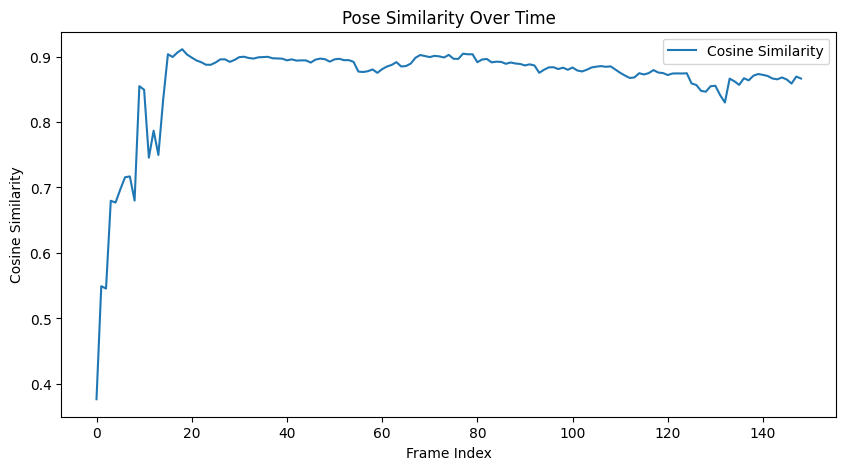

In [67]:
# 유사도 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(similarity_list, label='Cosine Similarity')
plt.xlabel('Frame Index')
plt.ylabel('Cosine Similarity')
plt.title('Pose Similarity Over Time')
plt.legend()
plt.show()

In [1]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# 미디어파이프 도구 설정
mp_drawing1 = mp.solutions.drawing_utils
mp_drawing_styles1 = mp.solutions.drawing_styles
mp_pose1 = mp.solutions.pose

mp_drawing2 = mp.solutions.drawing_utils
mp_drawing_styles2 = mp.solutions.drawing_styles
mp_pose2 = mp.solutions.pose

# 웹캠 디바이스 번호 및 비디오 파일 경로 설정
cam_file = 0  # 0번은 사용자 카메라
video_file = 'mag.mp4'  # 동영상 경로는 내 폴더에 맞게

# 두 개의 캡처 객체 생성
cap1 = cv2.VideoCapture(cam_file)
cap2 = cv2.VideoCapture(video_file)

if not cap1.isOpened() or not cap2.isOpened():
    print("하나 이상의 입력을 열 수 없습니다.")
    exit()

# 비디오의 프레임 레이트 가져오기
fps = cap2.get(cv2.CAP_PROP_FPS)

# 코사인 유사도 계산 함수
def cosine_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    return dot_product / (norm_v1 * norm_v2)

# 프레임 크기 조정 함수
def resize_image(image, width):
    aspect_ratio = image.shape[1] / image.shape[0]
    return cv2.resize(image, (width, int(width / aspect_ratio)))

# 프레임 스킵 설정
frame_skip = 2
frame_count = 0

# 유사도 값을 저장할 리스트
similarity_list = []

# MediaPipe 포즈 추정기 설정 및 프레임 처리 루프
with mp_pose1.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose1, \
    mp_pose2.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose2:
    
    while cap1.isOpened() and cap2.isOpened():
        # 프레임 읽기
        ret1, image1 = cap1.read()
        ret2, image2 = cap2.read()

        if not ret1 or not ret2:
            print("카메라를 찾을 수 없습니다.")
            break
        
        frame_count += 1
        if frame_count % frame_skip != 0:
            continue
        
        # 이미지 크기 조정
        image1 = resize_image(image1, 640)
        image2 = resize_image(image2, 640)
        
        # 이미지 전처리 및 포즈 추정
        image1.flags.writeable = False
        image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
        results1 = pose1.process(image1)

        image1.flags.writeable = True
        image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2BGR)
        mp_drawing1.draw_landmarks(image1, results1.pose_landmarks, mp_pose1.POSE_CONNECTIONS, 
                                landmark_drawing_spec=mp_drawing_styles1.get_default_pose_landmarks_style())
        
        image2.flags.writeable = False
        image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
        results2 = pose2.process(image2)

        image2.flags.writeable = True
        image2 = cv2.cvtColor(image2, cv2.COLOR_RGB2BGR)
        mp_drawing2.draw_landmarks(image2, results2.pose_landmarks, mp_pose2.POSE_CONNECTIONS, 
                                landmark_drawing_spec=mp_drawing_styles2.get_default_pose_landmarks_style())
        
        # 두 프레임의 크기를 동일하게 맞추기 (더 작은 크기에 맞추기)
        height = min(image1.shape[0], image2.shape[0])
        width = min(image1.shape[1], image2.shape[1])
        
        frame1 = cv2.resize(image1, (width, height))
        frame2 = cv2.resize(image2, (width, height))

        frame1 = cv2.flip(frame1, 1)
        frame2 = cv2.flip(frame2, 1)

        # 두 프레임을 가로로 합치기
        combined_frame = np.hstack((frame2, frame1))

        # 합쳐진 프레임을 윈도우에 표시
        cv2.imshow('Combined Frame', combined_frame)

        if results1.pose_landmarks and results2.pose_landmarks:
            def extract_keypoints(landmarks, indices):
                return np.array([[landmarks[i].x, landmarks[i].y, landmarks[i].z] for i in indices])

            # 키포인트 인덱스
            left_arm_indices = [11, 13, 15]
            left_leg_indices = [23, 25, 27]
            left_foot_indices = [29, 31]

            right_arm_indices = [12, 14, 16]
            right_leg_indices = [24, 26, 28]
            right_foot_indices = [30, 32]

            # 키포인트 추출
            keypoints1 = {
                'left_arm': extract_keypoints(results1.pose_landmarks.landmark, left_arm_indices),
                'left_leg': extract_keypoints(results1.pose_landmarks.landmark, left_leg_indices),
                'left_foot': extract_keypoints(results1.pose_landmarks.landmark, left_foot_indices),
                'right_arm': extract_keypoints(results1.pose_landmarks.landmark, right_arm_indices),
                'right_leg': extract_keypoints(results1.pose_landmarks.landmark, right_leg_indices),
                'right_foot': extract_keypoints(results1.pose_landmarks.landmark, right_foot_indices)
            }

            keypoints2 = {
                'left_arm': extract_keypoints(results2.pose_landmarks.landmark, left_arm_indices),
                'left_leg': extract_keypoints(results2.pose_landmarks.landmark, left_leg_indices),
                'left_foot': extract_keypoints(results2.pose_landmarks.landmark, left_foot_indices),
                'right_arm': extract_keypoints(results2.pose_landmarks.landmark, right_arm_indices),
                'right_leg': extract_keypoints(results2.pose_landmarks.landmark, right_leg_indices),
                'right_foot': extract_keypoints(results2.pose_landmarks.landmark, right_foot_indices)
            }

            # 코사인 유사도 계산
            similarities = []
            for key in keypoints1.keys():
                v1 = keypoints1[key].flatten()
                v2 = keypoints2[key].flatten()
                similarity = cosine_similarity(v1, v2)
                similarities.append(similarity)

            average_similarity = np.mean(similarities)
            similarity_list.append(average_similarity)

            print(f"Average Pose Similarity (Cosine similarity): {average_similarity}")

        # 'ESC' 키를 누르면 루프 종료
        if cv2.waitKey(1) & 0xFF == 27:
            break

# 캡처 객체 해제 및 윈도우 닫기
cap1.release()
cap2.release()
cv2.destroyAllWindows()

Average Pose Similarity (Cosine similarity): 0.8453843842833934
Average Pose Similarity (Cosine similarity): 0.8237788996777086
Average Pose Similarity (Cosine similarity): 0.8143001654998251
Average Pose Similarity (Cosine similarity): 0.8249302816545695
Average Pose Similarity (Cosine similarity): 0.8347989445071531
Average Pose Similarity (Cosine similarity): 0.8319006430978956
Average Pose Similarity (Cosine similarity): 0.8312309192448409
Average Pose Similarity (Cosine similarity): 0.831895429322818
Average Pose Similarity (Cosine similarity): 0.8232212009880344
Average Pose Similarity (Cosine similarity): 0.8017776834954283
Average Pose Similarity (Cosine similarity): 0.8028214215633156
Average Pose Similarity (Cosine similarity): 0.8132001405184849
Average Pose Similarity (Cosine similarity): 0.8173279783898658
Average Pose Similarity (Cosine similarity): 0.8242949295477611
Average Pose Similarity (Cosine similarity): 0.8366472137100288
Average Pose Similarity (Cosine similarit

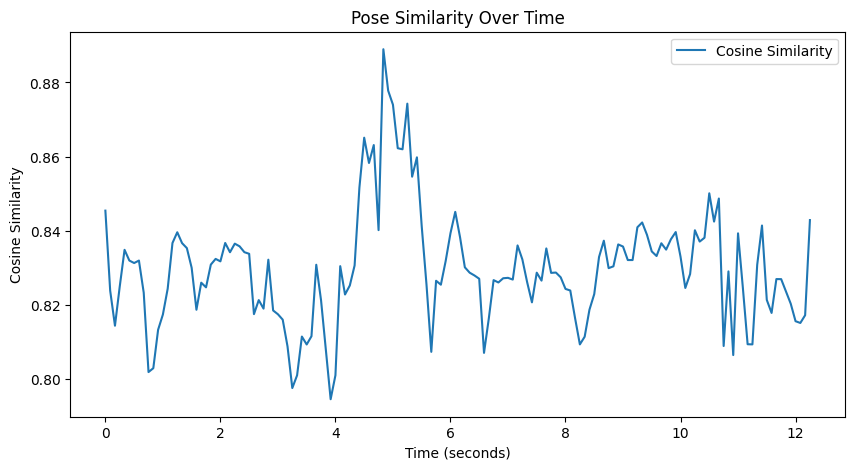

In [2]:
# 시간 축 값 생성
time_values = np.arange(0, len(similarity_list)) * (frame_skip / fps)

# 유사도 시각화
plt.figure(figsize=(10, 5))
plt.plot(time_values, similarity_list, label='Cosine Similarity')
plt.xlabel('Time (seconds)')
plt.ylabel('Cosine Similarity')
plt.title('Pose Similarity Over Time')
plt.legend()
plt.show()

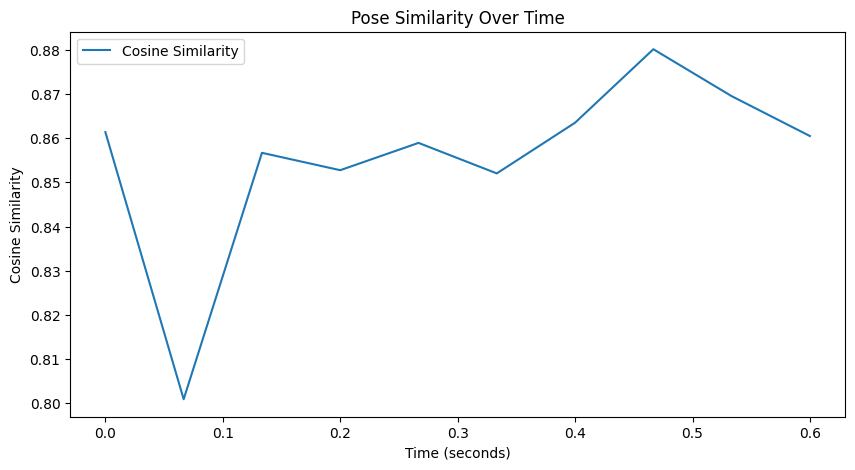

In [28]:
# 필요한 라이브러리
import cv2 # 이미지 처리 및 비디오 캡처
import mediapipe as mp # 포즈 추정
import numpy as np # 배열 연산 및 수학적 계산
import matplotlib.pyplot as plt # 그래프 시각화

# 미디어파이프 도구 설정
mp_drawing1 = mp.solutions.drawing_utils # 그림 그리기 유틸리티 설정
mp_drawing_styles1 = mp.solutions.drawing_styles # 그림 스타일 설정
mp_pose1 = mp.solutions.pose # 포즈 추정기 설정

mp_drawing2 = mp.solutions.drawing_utils 
mp_drawing_styles2 = mp.solutions.drawing_styles
mp_pose2 = mp.solutions.pose

# 웹캠 디바이스 번호 및 비디오 파일 경로 설정
cam_file = 0  # 0번은 사용자 카메라
video_file = 'love_lee.mp4'  # 동영상 경로는 내 폴더에 맞게

# 두 개의 캡처 객체 생성
cap1 = cv2.VideoCapture(cam_file)
cap2 = cv2.VideoCapture(video_file)

# 웹캠 또는 비디오 파일이 열리지 않으면 오류
if not cap1.isOpened() or not cap2.isOpened():
    print("하나 이상의 입력을 열 수 없습니다.")
    exit()

# 비디오의 프레임 레이트 가져오기
fps = cap2.get(cv2.CAP_PROP_FPS)

# 코사인 유사도 계산 함수 - 사용 이유
# 1.관절 위치 벡터의 방향 유사성 측정
# 2. 크기의 영향을 배제
# 3. 관절 간의 상대적인 위치 및 방향 평가
# 4. 일관성 있는 측정 기준 제공
def cosine_similarity(v1, v2): # 두 벡터 v1, v2 입력
    dot_product = np.dot(v1, v2) # v1, v2 내적을 계산 내적은 두 벡터의 각 원소를 곱한 후 그 결과를 합산한 값, 내적 값은 벡터가 얼마나 비슷한 방향을 가지는지 나타냄
    norm_v1 = np.linalg.norm(v1) # 벡터의 노름은 벡터의 크기 또는 길이를 의미
    norm_v2 = np.linalg.norm(v2)
    # 코사인 유사도는 내적을 두 벡터의 노름의 곱으로 나눈 값
    # 두 벡터 간의 각도를 측정하여, 벡터가 얼마나 유사한 방향을 가지는지를 나타냄 이 값은 -1과 1 사이의 값을 가짐
    # 1에 가까울수록 두 벡터는 매우 유사한 방향
    # 0에 가까울수록 두 벡터는 서로 직각 방향
    # -1에 가까울수록 두 벡터는 정반대 방향
    return dot_product / (norm_v1 * norm_v2)

# 프레임 크기 조정 함수 - 주어진 너비에 맞추어 이미지 크기 조정
def resize_image(image, width):
    aspect_ratio = image.shape[1] / image.shape[0]
    return cv2.resize(image, (width, int(width / aspect_ratio)))

# 프레임 스킵 설정
frame_skip = 2 # 몇 개의 프레임을 건너뛸지 설정
frame_count = 0 # 현재까지 처리한 프레임 수

# 포즈 유사도 값을 저장할 리스트
similarity_list = []

# MediaPipe 포즈 추정기 설정 및 프레임 처리 루프
# 포즈 감지와 추적의 최소 신뢰도 0.5로 설정
with mp_pose1.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose1, \
    mp_pose2.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose2:
    
    # 윈도우 크기 설정
    # window_name = 'Combined Frame'
    # cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
    
    # 웹캠과 비디오 열려있으면 반복
    while cap1.isOpened() and cap2.isOpened():
        # 프레임 읽기
        ret1, image1 = cap1.read() # 동영상 프레임
        ret2, image2 = cap2.read() # 웹캠 프레임

        # 프레임을 읽지 못하면 오류
        if not ret1 or not ret2:
            print("카메라를 찾을 수 없습니다.")
            break
        
        # 현재 프레임의 처리를 건너뛰거나 게속 진행
        frame_count += 1
        if frame_count % frame_skip != 0:
            continue
        
        # 이미지 크기 조정 - 비율을 유지하기 위해 높이도 자동 조정
        image1 = resize_image(image1, 640)
        image2 = resize_image(image2, 640)
        
        # 이미지 전처리 및 포즈 추정
        image1.flags.writeable = False
        image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
        results1 = pose1.process(image1)

        image1.flags.writeable = True
        image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2BGR)
        mp_drawing1.draw_landmarks(image1, results1.pose_landmarks, mp_pose1.POSE_CONNECTIONS, 
                                landmark_drawing_spec=mp_drawing_styles1.get_default_pose_landmarks_style())
        
        image2.flags.writeable = False
        image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
        results2 = pose2.process(image2)

        image2.flags.writeable = True
        image2 = cv2.cvtColor(image2, cv2.COLOR_RGB2BGR)
        mp_drawing2.draw_landmarks(image2, results2.pose_landmarks, mp_pose2.POSE_CONNECTIONS, 
                                landmark_drawing_spec=mp_drawing_styles2.get_default_pose_landmarks_style())
        
        # 두 프레임의 크기를 동일하게 맞추기 (더 작은 크기에 맞추기)
        height = min(image1.shape[0], image2.shape[0])
        width = min(image1.shape[1], image2.shape[1])
        
        frame1 = cv2.resize(image1, (width, height))
        frame2 = cv2.resize(image2, (width, height))

        # 수평으로 뒤집기 - 웹캠에서 미러 효과
        frame1 = cv2.flip(frame1, 1)

        # 좌표를 맞추기 위해 합쳐진 프레임을 상단 왼쪽에 정렬하여 결합
        # 두 프레임을 나란히 배치 - 새로운 프레임의 크기는 두 프레임의 높이와 두 배 너비를 가짐
        combined_frame = np.zeros((height, width * 2, 3), dtype=np.uint8)
        combined_frame[0:height, 0:width] = frame2
        combined_frame[0:height, width:width*2] = frame1

        # 합쳐진 프레임을 윈도우에 표시
        # cv2.imshow(window_name, combined_frame)
        cv2.imshow('combined_frame', combined_frame)
        
        # 윈도우 크기 조정 (가로 1280, 세로 720으로 설정)
        # cv2.resizeWindow(window_name, 1280, 720)

        if results1.pose_landmarks and results2.pose_landmarks:
            def extract_keypoints(landmarks, indices):
                return np.array([[landmarks[i].x, landmarks[i].y, landmarks[i].z] for i in indices])

            # 키포인트 인덱스
            left_arm_indices = [11, 13, 15] # 왼쪽 팔
            left_leg_indices = [23, 25, 27] # 왼쪽 다리
            left_foot_indices = [27, 29, 31] # 왼쪽 발

            right_arm_indices = [12, 14, 16] # 오른쪽 팔
            right_leg_indices = [24, 26, 28] # 오른쪽 다리
            right_foot_indices = [28, 30, 32] # 오른쪽 발

            # 키포인트 추출 - 좌측 팔,다리,발 우측 팔,다리,발 키포인트 추출하여 딕셔너리에 저장
            keypoints1 = {
                'left_arm': extract_keypoints(results1.pose_landmarks.landmark, left_arm_indices),
                'left_leg': extract_keypoints(results1.pose_landmarks.landmark, left_leg_indices),
                'left_foot': extract_keypoints(results1.pose_landmarks.landmark, left_foot_indices),
                'right_arm': extract_keypoints(results1.pose_landmarks.landmark, right_arm_indices),
                'right_leg': extract_keypoints(results1.pose_landmarks.landmark, right_leg_indices),
                'right_foot': extract_keypoints(results1.pose_landmarks.landmark, right_foot_indices)
            }

            keypoints2 = {
                'left_arm': extract_keypoints(results2.pose_landmarks.landmark, left_arm_indices),
                'left_leg': extract_keypoints(results2.pose_landmarks.landmark, left_leg_indices),
                'left_foot': extract_keypoints(results2.pose_landmarks.landmark, left_foot_indices),
                'right_arm': extract_keypoints(results2.pose_landmarks.landmark, right_arm_indices),
                'right_leg': extract_keypoints(results2.pose_landmarks.landmark, right_leg_indices),
                'right_foot': extract_keypoints(results2.pose_landmarks.landmark, right_foot_indices)
            }

            # 코사인 유사도 계산 - 각 키포인트 집합에 대해 벡터를 평탄화하고 코사인 유사도 계산하여 리스트에 저장
            similarities = []
            for key in keypoints1.keys():
                # 현재 관절 그룹의 좌표 벡터를 1차원 배열로 평탄화 - 해당 관절 그룹의 좌표 배열 -> 코사인 유사도를 계산할 때 벡터 형태로 필요
                v1 = keypoints1[key].flatten()
                v2 = keypoints2[key].flatten()
                # 두 벡터 간의 방향 유사성을 측정하며, 두 벡터의 내적을 벡터의 크기로 나눈 값을 반환
                similarity = cosine_similarity(v1, v2)
                # 계산된 유사도 저장
                similarities.append(similarity)

            # similarities 리스트에 저장된 모든 유사도의 평균을 계산 - 이 평균 유사도는 두 포즈 전체의 유사성을 나타내며, 각 관절 그룹 간의 유사도의 평균
            average_similarity = np.mean(similarities)
            # 계산된 평균 유사도 저장
            similarity_list.append(average_similarity)

            # print(f"Average Pose Similarity (Cosine similarity): {average_similarity}")

        # 'ESC' 키를 누르면 루프 종료
        if cv2.waitKey(1) & 0xFF == 27:
            break

# 캡처 객체 해제 및 윈도우 닫기
cap1.release()
cap2.release()
cv2.destroyAllWindows()

# 시간 축 값 생성 - 프레임 스킵 간격과 프레임 레이트를 고려하여 시간 축을 생성
time_values = np.arange(0, len(similarity_list)) * (frame_skip / fps)

# 유사도 시각화
plt.figure(figsize=(10, 5))
plt.plot(time_values, similarity_list, label='Cosine Similarity')
plt.xlabel('Time (seconds)')
plt.ylabel('Cosine Similarity')
plt.title('Pose Similarity Over Time')
plt.legend()
plt.show()

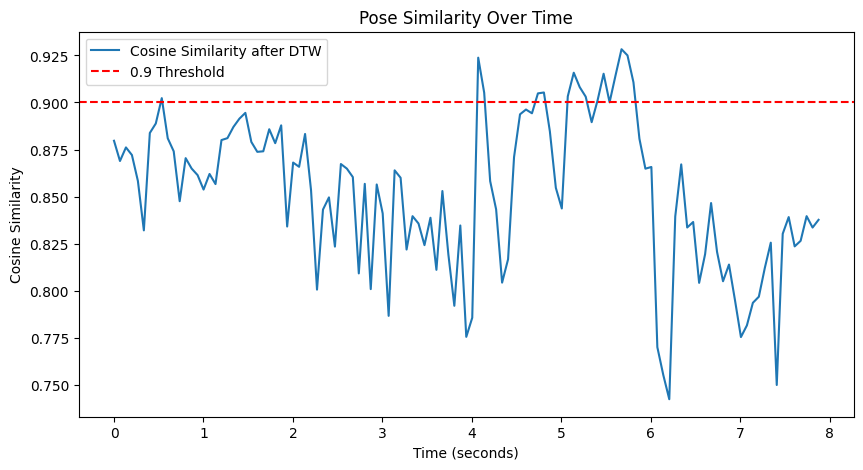

In [7]:
# 필요한 라이브러리
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import pygame

# 미디어파이프 도구 설정
mp_drawing1 = mp.solutions.drawing_utils
mp_drawing_styles1 = mp.solutions.drawing_styles
mp_pose1 = mp.solutions.pose

mp_drawing2 = mp.solutions.drawing_utils
mp_drawing_styles2 = mp.solutions.drawing_styles
mp_pose2 = mp.solutions.pose

# 웹캠 디바이스 번호 및 비디오 파일 경로 설정
cam_file = 0  # 0번은 사용자 카메라
video_file = 'child_tocatoca.mp4'  # 동영상 경로는 내 폴더에 맞게
audio_file = 'child_tocatoca.mp3'  # 오디오 파일 경로

# 두 개의 캡처 객체 생성
cap1 = cv2.VideoCapture(cam_file)
cap2 = cv2.VideoCapture(video_file)

# 웹캠 또는 비디오 파일이 열리지 않으면 오류
if not cap1.isOpened() or not cap2.isOpened():
    print("하나 이상의 입력을 열 수 없습니다.")
    exit()

# 비디오의 프레임 레이트 가져오기
fps = cap2.get(cv2.CAP_PROP_FPS)

# 코사인 유사도 계산 함수
def cosine_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    return dot_product / (norm_v1 * norm_v2)

# 프레임 크기 조정 함수
def resize_image(image, width):
    aspect_ratio = image.shape[1] / image.shape[0]
    return cv2.resize(image, (width, int(width / aspect_ratio)))

# 프레임 스킵 설정
frame_skip = 2
frame_count = 0

# 포즈 유사도 값을 저장할 리스트
similarity_list = []

# MediaPipe 포즈 추정기 설정 및 프레임 처리 루프
with mp_pose1.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose1, \
    mp_pose2.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose2:
    
    keypoints_sequence1 = []
    keypoints_sequence2 = []

    # pygame 초기화 및 오디오 파일 로드
    pygame.mixer.init()
    pygame.mixer.music.load(audio_file)
    pygame.mixer.music.play()
    
    while cap1.isOpened() and cap2.isOpened():
        ret1, image1 = cap1.read() # 웹캠 프레임
        ret2, image2 = cap2.read() # 동영상 프레임

        if not ret1 or not ret2:
            print("카메라를 찾을 수 없습니다.")
            break
        
        frame_count += 1
        if frame_count % frame_skip != 0:
            continue
        
        image1 = resize_image(image1, 800)
        image2 = resize_image(image2, 800)
        
        image1.flags.writeable = False
        image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
        results1 = pose1.process(image1)

        image1.flags.writeable = True
        image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2BGR)

        # Default drawing styles for pose landmarks
        default_landmarks_style = mp_drawing1.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2)
        default_connections_style = mp_drawing1.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4)

        # Special drawing style for points 0-9
        special_landmarks_style = mp_drawing1.DrawingSpec(color=(0, 255, 0), thickness=5, circle_radius=20)

        # Draw all landmarks with default styles
        mp_drawing1.draw_landmarks(
            image1, 
            results1.pose_landmarks, 
            mp_pose1.POSE_CONNECTIONS, 
            landmark_drawing_spec=default_landmarks_style,
            connection_drawing_spec=default_connections_style
        )

        # Draw special style for points 11,13,15,23,25,27,29,31,12,14,16,24,26,28,30,32
        if results1.pose_landmarks:
            for idx, landmark in enumerate(results1.pose_landmarks.landmark):
                if idx in [11,13,15,23,25,27,29,31,12,14,16,24,26,28,30,32]:
                    x = int(landmark.x * image1.shape[1])
                    y = int(landmark.y * image1.shape[0])
                    cv2.circle(image1, (x, y), special_landmarks_style.circle_radius, special_landmarks_style.color, special_landmarks_style.thickness)
        
        # 이거 주석하면 속도 돌아옴
        image2.flags.writeable = False
        image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
        results2 = pose2.process(image2)

        image2.flags.writeable = True
        image2 = cv2.cvtColor(image2, cv2.COLOR_RGB2BGR)
        mp_drawing2.draw_landmarks(image2, results2.pose_landmarks, mp_pose2.POSE_CONNECTIONS, 
                                landmark_drawing_spec=mp_drawing_styles2.get_default_pose_landmarks_style())
        
        height = min(image1.shape[0], image2.shape[0])
        width = min(image1.shape[1], image2.shape[1])
        
        frame1 = cv2.resize(image1, (width, height))
        frame2 = cv2.resize(image2, (width, height))

        frame1 = cv2.flip(frame1, 1)

        combined_frame = np.zeros((height, width * 2, 3), dtype=np.uint8)
        combined_frame[0:height, 0:width] = frame2
        combined_frame[0:height, width:width*2] = frame1

        cv2.imshow('combined_frame', combined_frame)
        # cv2.imshow('frame1',frame1)
        # cv2.imshow('frame2',frame2)
        
        if results1.pose_landmarks and results2.pose_landmarks:
            def extract_keypoints(landmarks, indices):
                return np.array([[landmarks[i].x, landmarks[i].y, landmarks[i].z] for i in indices])

            left_arm_indices = [11, 13, 15]
            left_leg_indices = [23, 25, 27]
            left_foot_indices = [27, 29, 31]
            right_arm_indices = [12, 14, 16]
            right_leg_indices = [24, 26, 28]
            right_foot_indices = [28, 30, 32]

            keypoints1 = {
                'left_arm': extract_keypoints(results1.pose_landmarks.landmark, left_arm_indices),
                'left_leg': extract_keypoints(results1.pose_landmarks.landmark, left_leg_indices),
                'left_foot': extract_keypoints(results1.pose_landmarks.landmark, left_foot_indices),
                'right_arm': extract_keypoints(results1.pose_landmarks.landmark, right_arm_indices),
                'right_leg': extract_keypoints(results1.pose_landmarks.landmark, right_leg_indices),
                'right_foot': extract_keypoints(results1.pose_landmarks.landmark, right_foot_indices)
            }

            keypoints2 = {
                'left_arm': extract_keypoints(results2.pose_landmarks.landmark, left_arm_indices),
                'left_leg': extract_keypoints(results2.pose_landmarks.landmark, left_leg_indices),
                'left_foot': extract_keypoints(results2.pose_landmarks.landmark, left_foot_indices),
                'right_arm': extract_keypoints(results2.pose_landmarks.landmark, right_arm_indices),
                'right_leg': extract_keypoints(results2.pose_landmarks.landmark, right_leg_indices),
                'right_foot': extract_keypoints(results2.pose_landmarks.landmark, right_foot_indices)
            }

            keypoints_sequence1.append(keypoints1)
            keypoints_sequence2.append(keypoints2)


        if cv2.waitKey(1) & 0xFF == 27:
            break

cap1.release()
cap2.release()
cv2.destroyAllWindows()
pygame.mixer.music.stop()

# 각 관절 그룹별로 DTW 적용
aligned_keypoints1 = []
aligned_keypoints2 = []

for key in keypoints_sequence1[0].keys():
    sequence1 = np.array([kp[key].flatten() for kp in keypoints_sequence1])
    sequence2 = np.array([kp[key].flatten() for kp in keypoints_sequence2])
    
    distance, path = fastdtw(sequence1, sequence2, dist=euclidean)
    aligned_sequence1 = [sequence1[idx1] for idx1, idx2 in path]
    aligned_sequence2 = [sequence2[idx2] for idx1, idx2 in path]
    
    aligned_keypoints1.append(aligned_sequence1)
    aligned_keypoints2.append(aligned_sequence2)

# 평균 유사도 계산
for i in range(len(aligned_keypoints1[0])):
    similarities = []
    for j in range(len(aligned_keypoints1)):
        # Ensure indices are within range
        if i < len(aligned_keypoints1[j]) and i < len(aligned_keypoints2[j]):
            similarity = cosine_similarity(aligned_keypoints1[j][i], aligned_keypoints2[j][i])
            similarities.append(similarity)
        else:
            pass
            # print(f"Index {i} is out of range for keypoints group {j}")
    
    if similarities:
        average_similarity = np.mean(similarities)
        similarity_list.append(average_similarity)
    else:
        print("No similarities calculated for this frame.")

time_values = np.arange(0, len(similarity_list)) * (frame_skip / fps)

plt.figure(figsize=(10, 5))
plt.plot(time_values, similarity_list, label='Cosine Similarity after DTW')
plt.axhline(y=0.9, color='r', linestyle='--', label='0.9 Threshold')
plt.xlabel('Time (seconds)')
plt.ylabel('Cosine Similarity')
plt.title('Pose Similarity Over Time')
plt.legend()
plt.show()

In [1]:
# 필요한 라이브러리
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import pygame

# 미디어파이프 도구 설정
mp_drawing1 = mp.solutions.drawing_utils
mp_drawing_styles1 = mp.solutions.drawing_styles
mp_pose1 = mp.solutions.pose

mp_drawing2 = mp.solutions.drawing_utils
mp_drawing_styles2 = mp.solutions.drawing_styles
mp_pose2 = mp.solutions.pose

# 웹캠 디바이스 번호 및 비디오 파일 경로 설정
cam_file = 0  # 0번은 사용자 카메라
video_file = 'child_tocatoca.mp4'  # 동영상 경로는 내 폴더에 맞게
audio_file = 'child_tocatoca.mp3'  # 오디오 파일 경로

# 두 개의 캡처 객체 생성
cap1 = cv2.VideoCapture(cam_file)
cap2 = cv2.VideoCapture(video_file)

# 웹캠 또는 비디오 파일이 열리지 않으면 오류
if not cap1.isOpened() or not cap2.isOpened():
    print("하나 이상의 입력을 열 수 없습니다.")
    exit()

# 비디오의 프레임 레이트 가져오기
fps = cap2.get(cv2.CAP_PROP_FPS)

# 코사인 유사도 계산 함수
def cosine_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    return dot_product / (norm_v1 * norm_v2)

# 프레임 크기 조정 함수
def resize_image(image, width):
    aspect_ratio = image.shape[1] / image.shape[0]
    return cv2.resize(image, (width, int(width / aspect_ratio)))

# 프레임 스킵 설정
frame_skip = 2
frame_count = 0

# 포즈 유사도 값을 저장할 리스트
similarity_list = []

# MediaPipe 포즈 추정기 설정 및 프레임 처리 루프
with mp_pose1.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose1, \
    mp_pose2.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose2:
    
    keypoints_sequence1 = []
    keypoints_sequence2 = []

    # pygame 초기화 및 오디오 파일 로드
    pygame.mixer.init()
    pygame.mixer.music.load(audio_file)
    pygame.mixer.music.play()

    while cap1.isOpened() and cap2.isOpened():
        ret1, image1 = cap1.read() # 웹캠 프레임
        ret2, image2 = cap2.read() # 동영상 프레임

        if not ret1 or not ret2:
            print("카메라를 찾을 수 없습니다.")
            break
        
        frame_count += 1
        if frame_count % frame_skip != 0:
            continue
        
        image1 = resize_image(image1, 400)
        image2 = resize_image(image2, 400)
        
        image1.flags.writeable = False
        image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
        results1 = pose1.process(image1)

        image1.flags.writeable = True
        image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2BGR)
        mp_drawing1.draw_landmarks(image1, results1.pose_landmarks, mp_pose1.POSE_CONNECTIONS, 
                                landmark_drawing_spec=mp_drawing_styles1.get_default_pose_landmarks_style())
        
        image2.flags.writeable = False
        image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
        results2 = pose2.process(image2)

        image2.flags.writeable = True
        image2 = cv2.cvtColor(image2, cv2.COLOR_RGB2BGR)
        # mp_drawing2.draw_landmarks(image2, results2.pose_landmarks, mp_pose2.POSE_CONNECTIONS, 
        #                         landmark_drawing_spec=mp_drawing_styles2.get_default_pose_landmarks_style())
        
        height = min(image1.shape[0], image2.shape[0])
        width = min(image1.shape[1], image2.shape[1])
        
        frame1 = cv2.resize(image1, (width, height))
        frame2 = cv2.resize(image2, (width, height))

        frame1 = cv2.flip(frame1, 1)

        combined_frame = np.zeros((height, width * 2, 3), dtype=np.uint8)
        combined_frame[0:height, 0:width] = frame2
        combined_frame[0:height, width:width*2] = frame1

        if results1.pose_landmarks and results2.pose_landmarks:
            def extract_keypoints(landmarks, indices):
                return np.array([[landmarks[i].x, landmarks[i].y, landmarks[i].z] for i in indices])

            left_arm_indices = [11, 13, 15]
            left_leg_indices = [23, 25, 27]
            left_foot_indices = [27, 29, 31]
            right_arm_indices = [12, 14, 16]
            right_leg_indices = [24, 26, 28]
            right_foot_indices = [28, 30, 32]

            keypoints1 = {
                'left_arm': extract_keypoints(results1.pose_landmarks.landmark, left_arm_indices),
                'left_leg': extract_keypoints(results1.pose_landmarks.landmark, left_leg_indices),
                'left_foot': extract_keypoints(results1.pose_landmarks.landmark, left_foot_indices),
                'right_arm': extract_keypoints(results1.pose_landmarks.landmark, right_arm_indices),
                'right_leg': extract_keypoints(results1.pose_landmarks.landmark, right_leg_indices),
                'right_foot': extract_keypoints(results1.pose_landmarks.landmark, right_foot_indices)
            }

            keypoints2 = {
                'left_arm': extract_keypoints(results2.pose_landmarks.landmark, left_arm_indices),
                'left_leg': extract_keypoints(results2.pose_landmarks.landmark, left_leg_indices),
                'left_foot': extract_keypoints(results2.pose_landmarks.landmark, left_foot_indices),
                'right_arm': extract_keypoints(results2.pose_landmarks.landmark, right_arm_indices),
                'right_leg': extract_keypoints(results2.pose_landmarks.landmark, right_leg_indices),
                'right_foot': extract_keypoints(results2.pose_landmarks.landmark, right_foot_indices)
            }

            keypoints_sequence1.append(keypoints1)
            keypoints_sequence2.append(keypoints2)

        # 평균 유사도 계산 및 그래프 업데이트
        similarity_list = []
        aligned_keypoints1 = []
        aligned_keypoints2 = []

        for key in keypoints_sequence1[0].keys():
            sequence1 = np.array([kp[key].flatten() for kp in keypoints_sequence1])
            sequence2 = np.array([kp[key].flatten() for kp in keypoints_sequence2])
            
            distance, path = fastdtw(sequence1, sequence2, dist=euclidean)
            aligned_sequence1 = [sequence1[idx1] for idx1, idx2 in path]
            aligned_sequence2 = [sequence2[idx2] for idx1, idx2 in path]
            
            aligned_keypoints1.append(aligned_sequence1)
            aligned_keypoints2.append(aligned_sequence2)

        for i in range(len(aligned_keypoints1[0])):
            similarities = []
            for j in range(len(aligned_keypoints1)):
                if i < len(aligned_keypoints1[j]) and i < len(aligned_keypoints2[j]):
                    similarity = cosine_similarity(aligned_keypoints1[j][i], aligned_keypoints2[j][i])
                    similarities.append(similarity)
                else:
                    print(f"Index {i} is out of range for keypoints group {j}")
            
            if similarities:
                average_similarity = np.mean(similarities)
                similarity_list.append(average_similarity)
            else:
                print("No similarities calculated for this frame.")

        time_values = np.arange(0, len(similarity_list)) * (frame_skip / fps)

        # 그래프를 이미지로 변환
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.plot(time_values, similarity_list, label='Cosine Similarity after DTW')
        ax.set_xlabel('Time (seconds)')
        ax.set_ylabel('Cosine Similarity')
        ax.set_title('Pose Similarity Over Time')
        ax.legend()

        fig.canvas.draw()
        graph_img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
        graph_img = graph_img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        plt.close(fig)

        graph_img = cv2.cvtColor(graph_img, cv2.COLOR_RGB2BGR)
        graph_img = resize_image(graph_img, combined_frame.shape[1])
        
        combined_frame_with_graph = np.zeros((combined_frame.shape[0] + graph_img.shape[0], combined_frame.shape[1], 3), dtype=np.uint8)
        combined_frame_with_graph[0:combined_frame.shape[0], 0:combined_frame.shape[1]] = combined_frame
        combined_frame_with_graph[combined_frame.shape[0]:, 0:graph_img.shape[1]] = graph_img

        cv2.imshow('combined_frame_with_graph', combined_frame_with_graph)
        
        if cv2.waitKey(1) & 0xFF == 27:
            break

cap1.release()
cap2.release()
cv2.destroyAllWindows()
pygame.mixer.music.stop()

pygame 2.5.0 (SDL 2.28.0, Python 3.11.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


pygame 2.5.0 (SDL 2.28.0, Python 3.11.2)
Hello from the pygame community. https://www.pygame.org/contribute.html
카메라를 찾을 수 없습니다.


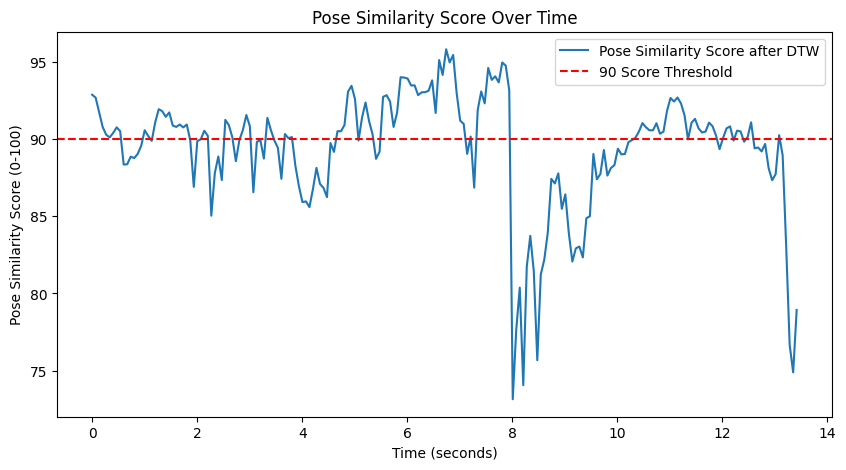

In [1]:
# 필요한 라이브러리
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import pygame

# 미디어파이프 도구 설정
mp_drawing1 = mp.solutions.drawing_utils  # 포즈 랜드마크 그리기 도구
mp_drawing_styles1 = mp.solutions.drawing_styles  # 포즈 랜드마크 스타일 도구
mp_pose1 = mp.solutions.pose  # 첫 번째 포즈 추정 모델

mp_drawing2 = mp.solutions.drawing_utils  # 두 번째 포즈 랜드마크 그리기 도구
mp_drawing_styles2 = mp.solutions.drawing_styles  # 두 번째 포즈 랜드마크 스타일 도구
mp_pose2 = mp.solutions.pose  # 두 번째 포즈 추정 모델

# 웹캠 디바이스 번호 및 비디오 파일 경로 설정
cam_file = 0  # 웹캠의 디바이스 번호 (0번은 기본 카메라)
video_file = 'video/child_tocatoca.mp4'  # 비교할 비디오 파일 경로
audio_file = 'sound/child_tocatoca.mp3'  # 재생할 오디오 파일 경로

# 두 개의 캡처 객체 생성
cap1 = cv2.VideoCapture(cam_file)  # 웹캠 캡처 객체
cap2 = cv2.VideoCapture(video_file)  # 비디오 파일 캡처 객체

# 웹캠 또는 비디오 파일이 열리지 않으면 오류 메시지 출력
if not cap1.isOpened() or not cap2.isOpened():
    print("하나 이상의 입력을 열 수 없습니다.")
    exit()

# 비디오의 프레임 레이트 가져오기
fps = cap2.get(cv2.CAP_PROP_FPS)  # 비디오 파일의 프레임 레이트를 가져옴

# 코사인 유사도 계산 함수
def cosine_similarity(v1, v2):
    dot_product = np.dot(v1, v2)  # 벡터 내적
    norm_v1 = np.linalg.norm(v1)  # 첫 번째 벡터의 크기 계산
    norm_v2 = np.linalg.norm(v2)  # 두 번째 벡터의 크기 계산
    return dot_product / (norm_v1 * norm_v2)  # 코사인 유사도 계산

# 프레임 크기 조정 함수
def resize_image(image, width):
    aspect_ratio = image.shape[1] / image.shape[0]  # 이미지의 종횡비 계산
    return cv2.resize(image, (width, int(width / aspect_ratio)))  # 주어진 너비에 맞춰 크기 조정

# L2 정규화 함수
def l2_normalize(vector):
    norm = np.linalg.norm(vector, ord=2, axis=1, keepdims=True)  # L2 norm 계산
    return vector / norm  # 각 좌표를 L2 norm으로 나누기

# 프레임 스킵 설정
frame_skip = 2  # 프레임을 건너뛰는 설정 (매 2번째 프레임만 처리)
frame_count = 0  # 현재 프레임 카운트

# 포즈 유사도 값을 저장할 리스트
similarity_list = []  # 유사도를 저장할 리스트 초기화

# 비디오의 총 길이(초) 계산
total_duration = cap2.get(cv2.CAP_PROP_FRAME_COUNT) / fps  # 동영상의 전체 시간을 계산

# MediaPipe 포즈 추정기 설정 및 프레임 처리 루프
with mp_pose1.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose1, \
    mp_pose2.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose2:
    
    keypoints_sequence1 = []  # 첫 번째 비디오의 키포인트 시퀀스 저장
    keypoints_sequence2 = []  # 두 번째 비디오의 키포인트 시퀀스 저장

    # pygame 초기화 및 오디오 파일 로드
    pygame.mixer.init()  # pygame 초기화
    pygame.mixer.music.load(audio_file)  # 오디오 파일 로드
    pygame.mixer.music.play()  # 오디오 재생 시작
    
    while cap1.isOpened() and cap2.isOpened():
        ret1, image1 = cap1.read() # 웹캠 프레임 읽기
        ret2, image2 = cap2.read() # 동영상 프레임 읽기

        if not ret1 or not ret2:
            print("카메라를 찾을 수 없습니다.")
            break
        
        frame_count += 1  # 프레임 카운트 증가
        if frame_count % frame_skip != 0:  # 프레임 스킵 적용
            continue
        
        image1 = resize_image(image1, 800)  # 웹캠 이미지 크기 조정
        image2 = resize_image(image2, 800)  # 비디오 이미지 크기 조정
        
        image1.flags.writeable = False  # 이미지 메모리를 읽기 전용으로 설정
        image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)  # BGR을 RGB로 변환
        results1 = pose1.process(image1)  # 첫 번째 포즈 추정 수행

        image1.flags.writeable = True  # 이미지 메모리를 쓰기 가능으로 설정
        image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2BGR)  # RGB를 BGR로 다시 변환

        # 포즈 랜드마크의 기본 스타일 설정
        default_landmarks_style = mp_drawing1.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2)
        default_connections_style = mp_drawing1.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4)

        # 0-9번 점들에 대한 특별한 스타일 설정
        special_landmarks_style = mp_drawing1.DrawingSpec(color=(0, 255, 0), thickness=5, circle_radius=20)

        # 기본 스타일로 모든 랜드마크를 그림
        mp_drawing1.draw_landmarks(
            image1, 
            results1.pose_landmarks, 
            mp_pose1.POSE_CONNECTIONS, 
            landmark_drawing_spec=default_landmarks_style,
            connection_drawing_spec=default_connections_style
        )

        # 11,13,15,23,25,27,29,31,12,14,16,24,26,28,30,32번 점에 대한 특별한 스타일로 그림
        if results1.pose_landmarks:
            for idx, landmark in enumerate(results1.pose_landmarks.landmark):
                if idx in [11,13,15,23,25,27,29,31,12,14,16,24,26,28,30,32]:
                    x = int(landmark.x * image1.shape[1])
                    y = int(landmark.y * image1.shape[0])
                    cv2.circle(image1, (x, y), special_landmarks_style.circle_radius, special_landmarks_style.color, special_landmarks_style.thickness)
        
        # 이거 주석하면 속도 돌아옴
        image2.flags.writeable = False  # 두 번째 이미지 메모리를 읽기 전용으로 설정
        image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)  # BGR을 RGB로 변환
        results2 = pose2.process(image2)  # 두 번째 포즈 추정 수행

        image2.flags.writeable = True  # 두 번째 이미지 메모리를 쓰기 가능으로 설정
        image2 = cv2.cvtColor(image2, cv2.COLOR_RGB2BGR)  # RGB를 BGR로 다시 변환
        mp_drawing2.draw_landmarks(image2, results2.pose_landmarks, mp_pose2.POSE_CONNECTIONS, 
                                landmark_drawing_spec=mp_drawing_styles2.get_default_pose_landmarks_style())
        
        height = min(image1.shape[0], image2.shape[0])  # 두 이미지의 높이 중 작은 값 선택
        width = min(image1.shape[1], image2.shape[1])  # 두 이미지의 너비 중 작은 값 선택
        
        frame1 = cv2.resize(image1, (width, height))  # 첫 번째 이미지를 동일 크기로 조정
        frame2 = cv2.resize(image2, (width, height))  # 두 번째 이미지를 동일 크기로 조정

        frame1 = cv2.flip(frame1, 1)  # 첫 번째 이미지를 좌우 반전

        combined_frame = np.zeros((height, width * 2, 3), dtype=np.uint8)  # 두 이미지를 담을 빈 프레임 생성
        combined_frame[0:height, 0:width] = frame2  # 왼쪽에 두 번째 이미지 배치
        combined_frame[0:height, width:width*2] = frame1  # 오른쪽에 첫 번째 이미지 배치

        # 현재 동영상의 거꾸로 된 시간을 계산
        elapsed_time = frame_count / fps  # 경과 시간을 초 단위로 계산
        remaining_time = total_duration - elapsed_time  # 남은 시간을 계산

        # 시간을 텍스트로 변환
        time_text = f'Time Remaining: {remaining_time:.0f} sec'

        # 텍스트 위치 설정
        text_position = (800, 25)  # 프레임 아래쪽에 텍스트 위치 설정

        # 텍스트 스타일 설정
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 1
        font_color = (255, 255, 255)
        font_thickness = 2

        # 텍스트를 합쳐진 프레임에 그리기
        cv2.putText(combined_frame, time_text, text_position, font, font_scale, font_color, font_thickness, cv2.LINE_AA)

        cv2.imshow('combined_frame', combined_frame)  # 합쳐진 이미지를 화면에 표시
        
        # 포즈 랜드마크가 둘 다 존재할 때
        if results1.pose_landmarks and results2.pose_landmarks:
            # 키포인트 추출 함수
            def extract_keypoints(landmarks, indices):
                keypoints = np.array([[landmarks[i].x, landmarks[i].y, landmarks[i].z] for i in indices])  # 선택된 인덱스의 랜드마크를 추출
                keypoints = l2_normalize(keypoints)  # L2 정규화 적용
                return keypoints

            left_arm_indices = [11, 13, 15]  # 왼쪽 팔의 랜드마크 인덱스
            left_leg_indices = [23, 25, 27]  # 왼쪽 다리의 랜드마크 인덱스
            left_foot_indices = [27, 29, 31]  # 왼쪽 발의 랜드마크 인덱스
            right_arm_indices = [12, 14, 16]  # 오른쪽 팔의 랜드마크 인덱스
            right_leg_indices = [24, 26, 28]  # 오른쪽 다리의 랜드마크 인덱스
            right_foot_indices = [28, 30, 32]  # 오른쪽 발의 랜드마크 인덱스

            keypoints1 = {
                'left_arm': extract_keypoints(results1.pose_landmarks.landmark, left_arm_indices),
                'left_leg': extract_keypoints(results1.pose_landmarks.landmark, left_leg_indices),
                'left_foot': extract_keypoints(results1.pose_landmarks.landmark, left_foot_indices),
                'right_arm': extract_keypoints(results1.pose_landmarks.landmark, right_arm_indices),
                'right_leg': extract_keypoints(results1.pose_landmarks.landmark, right_leg_indices),
                'right_foot': extract_keypoints(results1.pose_landmarks.landmark, right_foot_indices)
            }

            keypoints2 = {
                'left_arm': extract_keypoints(results2.pose_landmarks.landmark, left_arm_indices),
                'left_leg': extract_keypoints(results2.pose_landmarks.landmark, left_leg_indices),
                'left_foot': extract_keypoints(results2.pose_landmarks.landmark, left_foot_indices),
                'right_arm': extract_keypoints(results2.pose_landmarks.landmark, right_arm_indices),
                'right_leg': extract_keypoints(results2.pose_landmarks.landmark, right_leg_indices),
                'right_foot': extract_keypoints(results2.pose_landmarks.landmark, right_foot_indices)
            }

            keypoints_sequence1.append(keypoints1)  # 첫 번째 비디오의 키포인트 시퀀스 추가
            keypoints_sequence2.append(keypoints2)  # 두 번째 비디오의 키포인트 시퀀스 추가

        # 'ESC' 키가 눌리면 루프 종료
        if cv2.waitKey(1) & 0xFF == 27:
            break

# 캡처 객체 및 창 해제
cap1.release()
cap2.release()
cv2.destroyAllWindows()
pygame.mixer.music.stop()

# 각 관절 그룹별로 DTW 적용
aligned_keypoints1 = []  # 첫 번째 비디오의 정렬된 키포인트 시퀀스 저장
aligned_keypoints2 = []  # 두 번째 비디오의 정렬된 키포인트 시퀀스 저장

for key in keypoints_sequence1[0].keys():
    sequence1 = np.array([kp[key].flatten() for kp in keypoints_sequence1])  # 첫 번째 비디오의 키포인트 시퀀스
    sequence2 = np.array([kp[key].flatten() for kp in keypoints_sequence2])  # 두 번째 비디오의 키포인트 시퀀스
    
    distance, path = fastdtw(sequence1, sequence2, dist=euclidean)  # DTW를 사용한 정렬
    aligned_sequence1 = [sequence1[idx1] for idx1, idx2 in path]  # 첫 번째 비디오의 정렬된 시퀀스
    aligned_sequence2 = [sequence2[idx2] for idx1, idx2 in path]  # 두 번째 비디오의 정렬된 시퀀스
    
    aligned_keypoints1.append(aligned_sequence1)  # 정렬된 첫 번째 시퀀스 추가
    aligned_keypoints2.append(aligned_sequence2)  # 정렬된 두 번째 시퀀스 추가

# 평균 유사도 계산
for i in range(len(aligned_keypoints1[0])):
    similarities = []
    for j in range(len(aligned_keypoints1)):
        # 인덱스가 범위 내에 있는지 확인
        if i < len(aligned_keypoints1[j]) and i < len(aligned_keypoints2[j]):
            similarity = cosine_similarity(aligned_keypoints1[j][i], aligned_keypoints2[j][i])  # 코사인 유사도 계산
            similarities.append(similarity)
        else:
            pass
    
    if similarities:
        average_similarity = np.mean(similarities)  # 평균 유사도 계산
        similarity_list.append(average_similarity)  # 유사도 리스트에 추가
    else:
        print("No similarities calculated for this frame.")

# 시간 축 값 생성
time_values = np.arange(0, len(similarity_list)) * (frame_skip / fps)

# 유사도를 0-100 점수로 변환
score_list = [similarity * 100 for similarity in similarity_list]

# 유사도 점수 시각화
plt.figure(figsize=(10, 5))
plt.plot(time_values, score_list, label='Pose Similarity Score after DTW')  # 점수 그래프 그리기
plt.axhline(y=90, color='r', linestyle='--', label='90 Score Threshold')  # 기준선을 그리기
plt.xlabel('Time (seconds)')  # x축 라벨
plt.ylabel('Pose Similarity Score (0-100)')  # y축 라벨
plt.title('Pose Similarity Score Over Time')  # 그래프 제목
plt.legend()  # 범례 표시
plt.show()  # 그래프 출력

In [1]:
# 점수

import cv2
import mediapipe as mp
import numpy as np
import pygame
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

# 미디어파이프 도구 설정
mp_drawing1 = mp.solutions.drawing_utils
mp_drawing_styles1 = mp.solutions.drawing_styles
mp_pose1 = mp.solutions.pose

mp_drawing2 = mp.solutions.drawing_utils
mp_drawing_styles2 = mp.solutions.drawing_styles
mp_pose2 = mp.solutions.pose

# 웹캠 디바이스 번호 및 비디오 파일 경로 설정
cam_file = 0
video_file = 'video/child_tocatoca.mp4'
audio_file = 'sound/child_tocatoca.mp3'

# 두 개의 캡처 객체 생성
cap1 = cv2.VideoCapture(cam_file)
cap2 = cv2.VideoCapture(video_file)

if not cap1.isOpened() or not cap2.isOpened():
    print("하나 이상의 입력을 열 수 없습니다.")
    exit()

fps = cap2.get(cv2.CAP_PROP_FPS)

def cosine_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    return dot_product / (norm_v1 * norm_v2)

def resize_image(image, width):
    aspect_ratio = image.shape[1] / image.shape[0]
    return cv2.resize(image, (width, int(width / aspect_ratio)))

def l2_normalize(vector):
    norm = np.linalg.norm(vector, ord=2, axis=1, keepdims=True)
    return vector / norm

frame_skip = 2
frame_count = 0
similarity_list = []

total_duration = cap2.get(cv2.CAP_PROP_FRAME_COUNT) / fps

with mp_pose1.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose1, \
    mp_pose2.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose2:

    keypoints_sequence1 = []
    keypoints_sequence2 = []

    pygame.mixer.init()
    pygame.mixer.music.load(audio_file)
    pygame.mixer.music.play()
    
    scores_per_second = []
    accumulated_score = 0

    while cap1.isOpened() and cap2.isOpened():
        ret1, image1 = cap1.read()
        ret2, image2 = cap2.read()

        if not ret1 or not ret2:
            print("카메라를 찾을 수 없습니다.")
            break
        
        frame_count += 1
        if frame_count % frame_skip != 0:
            continue
        
        image1 = resize_image(image1, 800)
        image2 = resize_image(image2, 800)
        
        image1.flags.writeable = False
        image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
        results1 = pose1.process(image1)

        image1.flags.writeable = True
        image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2BGR)

        default_landmarks_style = mp_drawing1.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2)
        default_connections_style = mp_drawing1.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4)
        special_landmarks_style = mp_drawing1.DrawingSpec(color=(0, 255, 0), thickness=5, circle_radius=20)

        mp_drawing1.draw_landmarks(
            image1, 
            results1.pose_landmarks, 
            mp_pose1.POSE_CONNECTIONS, 
            landmark_drawing_spec=default_landmarks_style,
            connection_drawing_spec=default_connections_style
        )

        if results1.pose_landmarks:
            for idx, landmark in enumerate(results1.pose_landmarks.landmark):
                if idx in [11,13,15,23,25,27,29,31,12,14,16,24,26,28,30,32]:
                    x = int(landmark.x * image1.shape[1])
                    y = int(landmark.y * image1.shape[0])
                    cv2.circle(image1, (x, y), special_landmarks_style.circle_radius, special_landmarks_style.color, special_landmarks_style.thickness)
        
        image2.flags.writeable = False
        image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
        results2 = pose2.process(image2)
        
        image2.flags.writeable = True
        image2 = cv2.cvtColor(image2, cv2.COLOR_RGB2BGR)
        mp_drawing2.draw_landmarks(image2, results2.pose_landmarks, mp_pose2.POSE_CONNECTIONS, 
                                landmark_drawing_spec=mp_drawing_styles2.get_default_pose_landmarks_style())
        
        height = min(image1.shape[0], image2.shape[0])
        width = min(image1.shape[1], image2.shape[1])
        
        frame1 = cv2.resize(image1, (width, height))
        frame2 = cv2.resize(image2, (width, height))

        frame1 = cv2.flip(frame1, 1)

        combined_frame = np.zeros((height, width * 2, 3), dtype=np.uint8)
        combined_frame[0:height, 0:width] = frame2
        combined_frame[0:height, width:width*2] = frame1

        current_time = pygame.mixer.music.get_pos() / 1000
        reverse_time = total_duration - current_time

        if results1.pose_landmarks and results2.pose_landmarks:
            keypoints1 = [(lm.x, lm.y, lm.z) for lm in results1.pose_landmarks.landmark]
            keypoints2 = [(lm.x, lm.y, lm.z) for lm in results2.pose_landmarks.landmark]

            keypoints_sequence1.append(keypoints1)
            keypoints_sequence2.append(keypoints2)

            keypoints1_normalized = l2_normalize(np.array(keypoints1))
            keypoints2_normalized = l2_normalize(np.array(keypoints2))

            similarity = cosine_similarity(keypoints1_normalized.flatten(), keypoints2_normalized.flatten())
            similarity_list.append(similarity)
        
            cv2.putText(combined_frame, f"Similarity: {similarity:.2f}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        cv2.putText(combined_frame, f"Remaining Time: {reverse_time:.2f}s", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # 누적 점수 계산
        time_interval = 1
        if frame_count % int(fps * time_interval) == 0:
            segment_scores = similarity_list[-int(fps * time_interval):]
            if segment_scores:
                avg_score = np.mean(segment_scores)
                if 80 <= avg_score * 100 < 85:
                    score = 2
                elif 85 <= avg_score * 100 < 90:
                    score = 3
                elif 90 <= avg_score * 100 < 95:
                    score = 4
                elif avg_score * 100 >= 95:
                    score = 5
                else:
                    score = 1
                accumulated_score += score
                scores_per_second.append(accumulated_score)

        cv2.putText(combined_frame, f"Accumulated Score: {accumulated_score}", (10, 90), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        
        cv2.imshow('Pose Comparison', combined_frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# 자원 해제 및 종료
cap1.release()
cap2.release()
cv2.destroyAllWindows()
pygame.mixer.music.stop()


pygame 2.5.0 (SDL 2.28.0, Python 3.11.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


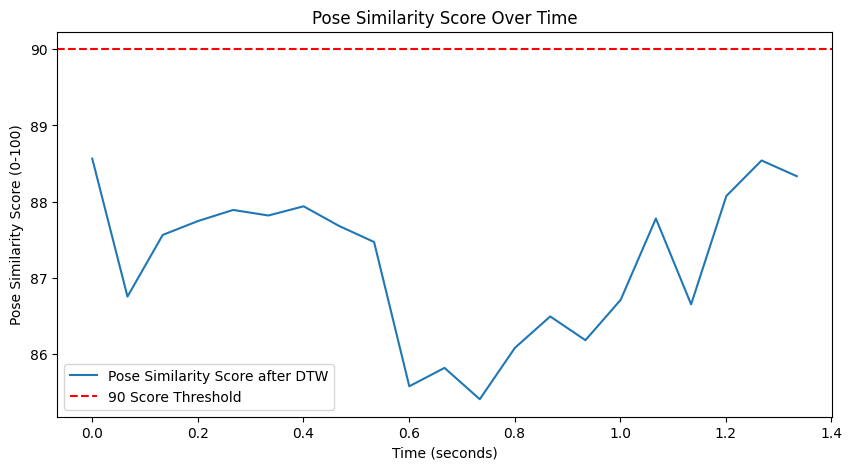

In [3]:
# 필요한 라이브러리
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import pygame

# 미디어파이프 도구 설정
mp_drawing1 = mp.solutions.drawing_utils  # 포즈 랜드마크 그리기 도구
mp_drawing_styles1 = mp.solutions.drawing_styles  # 포즈 랜드마크 스타일 도구
mp_pose1 = mp.solutions.pose  # 첫 번째 포즈 추정 모델

mp_drawing2 = mp.solutions.drawing_utils  # 두 번째 포즈 랜드마크 그리기 도구
mp_drawing_styles2 = mp.solutions.drawing_styles  # 두 번째 포즈 랜드마크 스타일 도구
mp_pose2 = mp.solutions.pose  # 두 번째 포즈 추정 모델

# 웹캠 디바이스 번호 및 비디오 파일 경로 설정
cam_file = 0  # 웹캠의 디바이스 번호 (0번은 기본 카메라)
video_file = 'video/child_tocatoca.mp4'  # 비교할 비디오 파일 경로
audio_file = 'sound/child_tocatoca.mp3'  # 재생할 오디오 파일 경로

# 두 개의 캡처 객체 생성
cap1 = cv2.VideoCapture(cam_file)  # 웹캠 캡처 객체
cap2 = cv2.VideoCapture(video_file)  # 비디오 파일 캡처 객체

# 웹캠 또는 비디오 파일이 열리지 않으면 오류 메시지 출력
if not cap1.isOpened() or not cap2.isOpened():
    print("하나 이상의 입력을 열 수 없습니다.")
    exit()

# 비디오의 프레임 레이트 가져오기
fps = cap2.get(cv2.CAP_PROP_FPS)  # 비디오 파일의 프레임 레이트를 가져옴

# 유사도를 계산할 때 임계값 설정 (예: 0.1 이하의 차이는 무시)
SIMILARITY_THRESHOLD = 0.01

# 코사인 유사도 계산 함수 수정
def cosine_similarity(v1, v2):
    dot_product = np.dot(v1, v2)  # 벡터 내적
    norm_v1 = np.linalg.norm(v1)  # 첫 번째 벡터의 크기 계산
    norm_v2 = np.linalg.norm(v2)  # 두 번째 벡터의 크기 계산
    similarity = dot_product / (norm_v1 * norm_v2)  # 코사인 유사도 계산
    # 유사도가 임계값 이하이면 낮은 유사도로 간주
    if similarity > (1 - SIMILARITY_THRESHOLD):
        similarity = 0  # 임계값 이하 차이는 무시
    return similarity

# 프레임 크기 조정 함수
def resize_image(image, width):
    aspect_ratio = image.shape[1] / image.shape[0]  # 이미지의 종횡비 계산
    return cv2.resize(image, (width, int(width / aspect_ratio)))  # 주어진 너비에 맞춰 크기 조정

# L2 정규화 함수
def l2_normalize(vector):
    norm = np.linalg.norm(vector, ord=2, axis=1, keepdims=True)  # L2 norm 계산
    return vector / norm  # 각 좌표를 L2 norm으로 나누기

# 프레임 스킵 설정
frame_skip = 2  # 프레임을 건너뛰는 설정 (매 2번째 프레임만 처리)
frame_count = 0  # 현재 프레임 카운트

# 포즈 유사도 값을 저장할 리스트
similarity_list = []  # 유사도를 저장할 리스트 초기화

# 비디오의 총 길이(초) 계산
total_duration = cap2.get(cv2.CAP_PROP_FRAME_COUNT) / fps  # 동영상의 전체 시간을 계산

# MediaPipe 포즈 추정기 설정 및 프레임 처리 루프
with mp_pose1.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose1, \
    mp_pose2.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose2:
    
    keypoints_sequence1 = []  # 첫 번째 비디오의 키포인트 시퀀스 저장
    keypoints_sequence2 = []  # 두 번째 비디오의 키포인트 시퀀스 저장

    # pygame 초기화 및 오디오 파일 로드
    pygame.mixer.init()  # pygame 초기화
    pygame.mixer.music.load(audio_file)  # 오디오 파일 로드
    pygame.mixer.music.play()  # 오디오 재생 시작
    
    while cap1.isOpened() and cap2.isOpened():
        ret1, image1 = cap1.read() # 웹캠 프레임 읽기
        ret2, image2 = cap2.read() # 동영상 프레임 읽기

        if not ret1 or not ret2:
            print("카메라를 찾을 수 없습니다.")
            break
        
        frame_count += 1  # 프레임 카운트 증가
        if frame_count % frame_skip != 0:  # 프레임 스킵 적용
            continue
        
        image1 = resize_image(image1, 800)  # 웹캠 이미지 크기 조정
        image2 = resize_image(image2, 800)  # 비디오 이미지 크기 조정
        
        image1.flags.writeable = False  # 이미지 메모리를 읽기 전용으로 설정
        image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)  # BGR을 RGB로 변환
        results1 = pose1.process(image1)  # 첫 번째 포즈 추정 수행

        image1.flags.writeable = True  # 이미지 메모리를 쓰기 가능으로 설정
        image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2BGR)  # RGB를 BGR로 다시 변환

        # 포즈 랜드마크의 기본 스타일 설정
        default_landmarks_style = mp_drawing1.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2)
        default_connections_style = mp_drawing1.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4)

        # 0-9번 점들에 대한 특별한 스타일 설정
        special_landmarks_style = mp_drawing1.DrawingSpec(color=(0, 255, 0), thickness=5, circle_radius=20)

        # 기본 스타일로 모든 랜드마크를 그림
        mp_drawing1.draw_landmarks(
            image1, 
            results1.pose_landmarks, 
            mp_pose1.POSE_CONNECTIONS, 
            landmark_drawing_spec=default_landmarks_style,
            connection_drawing_spec=default_connections_style
        )

        # 11,13,15,23,25,27,29,31,12,14,16,24,26,28,30,32번 점에 대한 특별한 스타일로 그림
        if results1.pose_landmarks:
            for idx, landmark in enumerate(results1.pose_landmarks.landmark):
                if idx in [11,13,15,23,25,27,29,31,12,14,16,24,26,28,30,32]:
                    x = int(landmark.x * image1.shape[1])
                    y = int(landmark.y * image1.shape[0])
                    cv2.circle(image1, (x, y), special_landmarks_style.circle_radius, special_landmarks_style.color, special_landmarks_style.thickness)
        
        # 이거 주석하면 속도 돌아옴
        image2.flags.writeable = False  # 두 번째 이미지 메모리를 읽기 전용으로 설정
        image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)  # BGR을 RGB로 변환
        results2 = pose2.process(image2)  # 두 번째 포즈 추정 수행

        image2.flags.writeable = True  # 두 번째 이미지 메모리를 쓰기 가능으로 설정
        image2 = cv2.cvtColor(image2, cv2.COLOR_RGB2BGR)  # RGB를 BGR로 다시 변환
        mp_drawing2.draw_landmarks(image2, results2.pose_landmarks, mp_pose2.POSE_CONNECTIONS, 
                                landmark_drawing_spec=mp_drawing_styles2.get_default_pose_landmarks_style())
        
        height = min(image1.shape[0], image2.shape[0])  # 두 이미지의 높이 중 작은 값 선택
        width = min(image1.shape[1], image2.shape[1])  # 두 이미지의 너비 중 작은 값 선택
        
        frame1 = cv2.resize(image1, (width, height))  # 첫 번째 이미지를 동일 크기로 조정
        frame2 = cv2.resize(image2, (width, height))  # 두 번째 이미지를 동일 크기로 조정

        frame1 = cv2.flip(frame1, 1)  # 첫 번째 이미지를 좌우 반전

        combined_frame = np.zeros((height, width * 2, 3), dtype=np.uint8)  # 두 이미지를 담을 빈 프레임 생성
        combined_frame[0:height, 0:width] = frame2  # 왼쪽에 두 번째 이미지 배치
        combined_frame[0:height, width:width*2] = frame1  # 오른쪽에 첫 번째 이미지 배치

        # 현재 동영상의 거꾸로 된 시간을 계산
        elapsed_time = frame_count / fps  # 경과 시간을 초 단위로 계산
        remaining_time = total_duration - elapsed_time  # 남은 시간을 계산

        # 시간을 텍스트로 변환
        time_text = f'Time Remaining: {remaining_time:.0f} sec'

        # 텍스트 위치 설정
        text_position = (800, 25)  # 프레임 아래쪽에 텍스트 위치 설정

        # 텍스트 스타일 설정
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 1
        font_color = (255, 255, 255)
        font_thickness = 2

        # 텍스트를 합쳐진 프레임에 그리기
        cv2.putText(combined_frame, time_text, text_position, font, font_scale, font_color, font_thickness, cv2.LINE_AA)

        cv2.imshow('combined_frame', combined_frame)  # 합쳐진 이미지를 화면에 표시
        
        # 포즈 랜드마크가 둘 다 존재할 때
        if results1.pose_landmarks and results2.pose_landmarks:
            # 키포인트 추출 함수
            def extract_keypoints(landmarks, indices):
                keypoints = np.array([[landmarks[i].x, landmarks[i].y, landmarks[i].z] for i in indices])  # 선택된 인덱스의 랜드마크를 추출
                keypoints = l2_normalize(keypoints)  # L2 정규화 적용
                return keypoints

            left_arm_indices = [11, 13, 15]  # 왼쪽 팔의 랜드마크 인덱스
            left_leg_indices = [23, 25, 27]  # 왼쪽 다리의 랜드마크 인덱스
            left_foot_indices = [27, 29, 31]  # 왼쪽 발의 랜드마크 인덱스
            right_arm_indices = [12, 14, 16]  # 오른쪽 팔의 랜드마크 인덱스
            right_leg_indices = [24, 26, 28]  # 오른쪽 다리의 랜드마크 인덱스
            right_foot_indices = [28, 30, 32]  # 오른쪽 발의 랜드마크 인덱스

            keypoints1 = {
                'left_arm': extract_keypoints(results1.pose_landmarks.landmark, left_arm_indices),
                'left_leg': extract_keypoints(results1.pose_landmarks.landmark, left_leg_indices),
                'left_foot': extract_keypoints(results1.pose_landmarks.landmark, left_foot_indices),
                'right_arm': extract_keypoints(results1.pose_landmarks.landmark, right_arm_indices),
                'right_leg': extract_keypoints(results1.pose_landmarks.landmark, right_leg_indices),
                'right_foot': extract_keypoints(results1.pose_landmarks.landmark, right_foot_indices)
            }

            keypoints2 = {
                'left_arm': extract_keypoints(results2.pose_landmarks.landmark, left_arm_indices),
                'left_leg': extract_keypoints(results2.pose_landmarks.landmark, left_leg_indices),
                'left_foot': extract_keypoints(results2.pose_landmarks.landmark, left_foot_indices),
                'right_arm': extract_keypoints(results2.pose_landmarks.landmark, right_arm_indices),
                'right_leg': extract_keypoints(results2.pose_landmarks.landmark, right_leg_indices),
                'right_foot': extract_keypoints(results2.pose_landmarks.landmark, right_foot_indices)
            }

            keypoints_sequence1.append(keypoints1)  # 첫 번째 비디오의 키포인트 시퀀스 추가
            keypoints_sequence2.append(keypoints2)  # 두 번째 비디오의 키포인트 시퀀스 추가

        # 'ESC' 키가 눌리면 루프 종료
        if cv2.waitKey(1) & 0xFF == 27:
            break

# 캡처 객체 및 창 해제
cap1.release()
cap2.release()
cv2.destroyAllWindows()
pygame.mixer.music.stop()

# 각 관절 그룹별로 DTW 적용
aligned_keypoints1 = []  # 첫 번째 비디오의 정렬된 키포인트 시퀀스 저장
aligned_keypoints2 = []  # 두 번째 비디오의 정렬된 키포인트 시퀀스 저장

for key in keypoints_sequence1[0].keys():
    sequence1 = np.array([kp[key].flatten() for kp in keypoints_sequence1])  # 첫 번째 비디오의 키포인트 시퀀스
    sequence2 = np.array([kp[key].flatten() for kp in keypoints_sequence2])  # 두 번째 비디오의 키포인트 시퀀스
    
    distance, path = fastdtw(sequence1, sequence2, dist=euclidean)  # DTW를 사용한 정렬
    aligned_sequence1 = [sequence1[idx1] for idx1, idx2 in path]  # 첫 번째 비디오의 정렬된 시퀀스
    aligned_sequence2 = [sequence2[idx2] for idx1, idx2 in path]  # 두 번째 비디오의 정렬된 시퀀스
    
    aligned_keypoints1.append(aligned_sequence1)  # 정렬된 첫 번째 시퀀스 추가
    aligned_keypoints2.append(aligned_sequence2)  # 정렬된 두 번째 시퀀스 추가

# 평균 유사도 계산 부분도 유사도 차이를 더 명확히 반영하도록 수정:
for i in range(len(aligned_keypoints1[0])):
    similarities = []
    for j in range(len(aligned_keypoints1)):
        if i < len(aligned_keypoints1[j]) and i < len(aligned_keypoints2[j]):
            similarity = cosine_similarity(aligned_keypoints1[j][i], aligned_keypoints2[j][i])  # 코사인 유사도 계산
            similarities.append(similarity)
    if similarities:
        average_similarity = np.mean(similarities) * 100  # 평균 유사도를 100점 만점으로 변환
        similarity_list.append(average_similarity)
    else:
        similarity_list.append(0)  # 유사도가 없으면 0점으로 처리

# 시간 축 값 생성
time_values = np.arange(0, len(similarity_list)) * (frame_skip / fps)

# 유사도를 0-100 점수로 변환
score_list = [similarity for similarity in similarity_list]

# 유사도 점수 시각화
plt.figure(figsize=(10, 5))
plt.plot(time_values, similarity_list, label='Pose Similarity Score after DTW')  # 점수 그래프 그리기
plt.axhline(y=90, color='r', linestyle='--', label='90 Score Threshold')  # 기준선을 그리기
plt.xlabel('Time (seconds)')  # x축 라벨
plt.ylabel('Pose Similarity Score (0-100)')  # y축 라벨
plt.title('Pose Similarity Score Over Time')  # 그래프 제목
plt.legend()  # 범례 표시
plt.show()  # 그래프 출력

In [ ]:
# 점수

import cv2
import mediapipe as mp
import numpy as np
import pygame
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

# 미디어파이프 도구 설정
mp_drawing1 = mp.solutions.drawing_utils
mp_drawing_styles1 = mp.solutions.drawing_styles
mp_pose1 = mp.solutions.pose

mp_drawing2 = mp.solutions.drawing_utils
mp_drawing_styles2 = mp.solutions.drawing_styles
mp_pose2 = mp.solutions.pose

# 웹캠 디바이스 번호 및 비디오 파일 경로 설정
cam_file = 0
video_file = 'video/child_tocatoca.mp4'
audio_file = 'sound/child_tocatoca.mp3'

# 두 개의 캡처 객체 생성
cap1 = cv2.VideoCapture(cam_file)
cap2 = cv2.VideoCapture(video_file)

if not cap1.isOpened() or not cap2.isOpened():
    print("하나 이상의 입력을 열 수 없습니다.")
    exit()

fps = cap2.get(cv2.CAP_PROP_FPS)

def cosine_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    return dot_product / (norm_v1 * norm_v2)

def resize_image(image, width):
    aspect_ratio = image.shape[1] / image.shape[0]
    return cv2.resize(image, (width, int(width / aspect_ratio)))

def l2_normalize(vector):
    norm = np.linalg.norm(vector, ord=2, axis=1, keepdims=True)
    return vector / norm

frame_skip = 2
frame_count = 0
similarity_list = []

total_duration = cap2.get(cv2.CAP_PROP_FRAME_COUNT) / fps

with mp_pose1.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose1, \
    mp_pose2.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose2:

    keypoints_sequence1 = []
    keypoints_sequence2 = []

    pygame.mixer.init()
    pygame.mixer.music.load(audio_file)
    pygame.mixer.music.play()
    
    scores_per_second = []
    accumulated_score = 0

    while cap1.isOpened() and cap2.isOpened():
        ret1, image1 = cap1.read()
        ret2, image2 = cap2.read()

        if not ret1 or not ret2:
            print("카메라를 찾을 수 없습니다.")
            break
        
        frame_count += 1
        if frame_count % frame_skip != 0:
            continue
        
        image1 = resize_image(image1, 800)
        image2 = resize_image(image2, 800)
        
        image1.flags.writeable = False
        image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
        results1 = pose1.process(image1)

        image1.flags.writeable = True
        image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2BGR)

        default_landmarks_style = mp_drawing1.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2)
        default_connections_style = mp_drawing1.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4)
        special_landmarks_style = mp_drawing1.DrawingSpec(color=(0, 255, 0), thickness=5, circle_radius=20)

        mp_drawing1.draw_landmarks(
            image1, 
            results1.pose_landmarks, 
            mp_pose1.POSE_CONNECTIONS, 
            landmark_drawing_spec=default_landmarks_style,
            connection_drawing_spec=default_connections_style
        )

        if results1.pose_landmarks:
            for idx, landmark in enumerate(results1.pose_landmarks.landmark):
                if idx in [11,13,15,23,25,27,29,31,12,14,16,24,26,28,30,32]:
                    x = int(landmark.x * image1.shape[1])
                    y = int(landmark.y * image1.shape[0])
                    cv2.circle(image1, (x, y), special_landmarks_style.circle_radius, special_landmarks_style.color, special_landmarks_style.thickness)
        
        image2.flags.writeable = False
        image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
        results2 = pose2.process(image2)
        
        image2.flags.writeable = True
        image2 = cv2.cvtColor(image2, cv2.COLOR_RGB2BGR)
        mp_drawing2.draw_landmarks(image2, results2.pose_landmarks, mp_pose2.POSE_CONNECTIONS, 
                                landmark_drawing_spec=mp_drawing_styles2.get_default_pose_landmarks_style())
        
        height = min(image1.shape[0], image2.shape[0])
        width = min(image1.shape[1], image2.shape[1])
        
        frame1 = cv2.resize(image1, (width, height))
        frame2 = cv2.resize(image2, (width, height))

        frame1 = cv2.flip(frame1, 1)

        combined_frame = np.zeros((height, width * 2, 3), dtype=np.uint8)
        combined_frame[0:height, 0:width] = frame2
        combined_frame[0:height, width:width*2] = frame1

        current_time = pygame.mixer.music.get_pos() / 1000
        reverse_time = total_duration - current_time

        if results1.pose_landmarks and results2.pose_landmarks:
            keypoints1 = [(lm.x, lm.y, lm.z) for lm in results1.pose_landmarks.landmark]
            keypoints2 = [(lm.x, lm.y, lm.z) for lm in results2.pose_landmarks.landmark]

            keypoints_sequence1.append(keypoints1)
            keypoints_sequence2.append(keypoints2)

            keypoints1_normalized = l2_normalize(np.array(keypoints1))
            keypoints2_normalized = l2_normalize(np.array(keypoints2))

            similarity = cosine_similarity(keypoints1_normalized.flatten(), keypoints2_normalized.flatten())
            similarity_list.append(similarity)
        
            cv2.putText(combined_frame, f"Similarity: {similarity:.2f}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        cv2.putText(combined_frame, f"Remaining Time: {reverse_time:.2f}s", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # 누적 점수 계산
        time_interval = 1
        if frame_count % int(fps * time_interval) == 0:
            segment_scores = similarity_list[-int(fps * time_interval):]
            if segment_scores:
                avg_score = np.mean(segment_scores)
                if 80 <= avg_score * 100 < 85:
                    score = 2
                elif 85 <= avg_score * 100 < 90:
                    score = 3
                elif 90 <= avg_score * 100 < 95:
                    score = 4
                elif avg_score * 100 >= 95:
                    score = 5
                else:
                    score = 1
                accumulated_score += score
                scores_per_second.append(accumulated_score)

        cv2.putText(combined_frame, f"Accumulated Score: {accumulated_score}", (10, 90), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        
        cv2.imshow('Pose Comparison', combined_frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# 자원 해제 및 종료
cap1.release()
cap2.release()
cv2.destroyAllWindows()
pygame.mixer.music.stop()

pygame 2.5.0 (SDL 2.28.0, Python 3.11.2)
Hello from the pygame community. https://www.pygame.org/contribute.html
카메라를 찾을 수 없습니다.


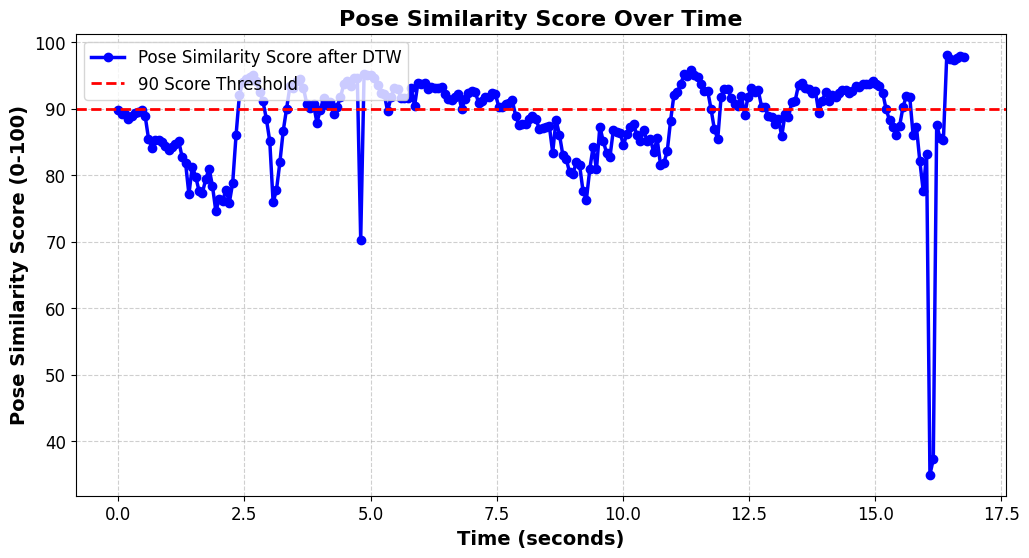

In [1]:
# 필요한 라이브러리
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import pygame

# 미디어파이프 도구 설정
mp_drawing1 = mp.solutions.drawing_utils  # 포즈 랜드마크 그리기 도구
mp_drawing_styles1 = mp.solutions.drawing_styles  # 포즈 랜드마크 스타일 도구
mp_pose1 = mp.solutions.pose  # 첫 번째 포즈 추정 모델

mp_drawing2 = mp.solutions.drawing_utils  # 두 번째 포즈 랜드마크 그리기 도구
mp_drawing_styles2 = mp.solutions.drawing_styles  # 두 번째 포즈 랜드마크 스타일 도구
mp_pose2 = mp.solutions.pose  # 두 번째 포즈 추정 모델

# 웹캠 디바이스 번호 및 비디오 파일 경로 설정
cam_file = 0  # 웹캠의 디바이스 번호 (0번은 기본 카메라)
video_file = 'video/shots1.mp4'  # 비교할 비디오 파일 경로
audio_file = 'audio/shots1.mp3'  # 재생할 오디오 파일 경로

# 두 개의 캡처 객체 생성
cap1 = cv2.VideoCapture(cam_file)  # 웹캠 캡처 객체
cap2 = cv2.VideoCapture(video_file)  # 비디오 파일 캡처 객체

# 웹캠 또는 비디오 파일이 열리지 않으면 오류 메시지 출력
if not cap1.isOpened() or not cap2.isOpened():
    print("하나 이상의 입력을 열 수 없습니다.")
    exit()

# 비디오의 프레임 레이트 가져오기
fps = cap2.get(cv2.CAP_PROP_FPS)  # 비디오 파일의 프레임 레이트를 가져옴

# 유사도를 계산할 때 임계값 설정 (예: 0.1 이하의 차이는 무시)
SIMILARITY_THRESHOLD = 0.01

# 코사인 유사도 계산 함수 수정
def cosine_similarity(v1, v2):
    dot_product = np.dot(v1, v2)  # 벡터 내적
    norm_v1 = np.linalg.norm(v1)  # 첫 번째 벡터의 크기 계산
    norm_v2 = np.linalg.norm(v2)  # 두 번째 벡터의 크기 계산
    similarity = dot_product / (norm_v1 * norm_v2)  # 코사인 유사도 계산
    # 유사도가 임계값 이하이면 낮은 유사도로 간주
    if similarity > (1 - SIMILARITY_THRESHOLD):
        similarity = 0  # 임계값 이하 차이는 무시
    return similarity

def detailed_joint_analysis(keypoints1, keypoints2, indices):
    # 개별 관절의 유사도 계산
    detailed_similarities = []
    for index in indices:
        v1, v2 = keypoints1[index], keypoints2[index]
        similarity = cosine_similarity(v1, v2)
        detailed_similarities.append(similarity)
    return np.mean(detailed_similarities)

def overall_motion_analysis(keypoints1, keypoints2, indices):
    # 전체 동작 흐름의 유사도 계산
    overall_vectors = []
    for index in indices:
        vector1 = np.array([keypoints1[index]['x'], keypoints1[index]['y']])
        vector2 = np.array([keypoints2[index]['x'], keypoints2[index]['y']])
        overall_vectors.append(cosine_similarity(vector1, vector2))
    return np.mean(overall_vectors)


# 프레임 크기 조정 함수
def resize_image(image, width):
    aspect_ratio = image.shape[1] / image.shape[0]  # 이미지의 종횡비 계산
    return cv2.resize(image, (width, int(width / aspect_ratio)))  # 주어진 너비에 맞춰 크기 조정

# L2 정규화 함수
def l2_normalize(vector):
    norm = np.linalg.norm(vector, ord=2, axis=1, keepdims=True)  # L2 norm 계산
    return vector / norm  # 각 좌표를 L2 norm으로 나누기

# 프레임 스킵 설정
frame_skip = 2  # 프레임을 건너뛰는 설정 (매 2번째 프레임만 처리)
frame_count = 0  # 현재 프레임 카운트

# 포즈 유사도 값을 저장할 리스트
similarity_list = []  # 유사도를 저장할 리스트 초기화

# 비디오의 총 길이(초) 계산
total_duration = cap2.get(cv2.CAP_PROP_FRAME_COUNT) / fps  # 동영상의 전체 시간을 계산

# MediaPipe 포즈 추정기 설정 및 프레임 처리 루프
with mp_pose1.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose1, \
    mp_pose2.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose2:
    
    keypoints_sequence1 = []  # 첫 번째 비디오의 키포인트 시퀀스 저장
    keypoints_sequence2 = []  # 두 번째 비디오의 키포인트 시퀀스 저장

    # pygame 초기화 및 오디오 파일 로드
    pygame.mixer.init()  # pygame 초기화
    pygame.mixer.music.load(audio_file)  # 오디오 파일 로드
    pygame.mixer.music.play()  # 오디오 재생 시작
    
    while cap1.isOpened() and cap2.isOpened():
        ret1, image1 = cap1.read() # 웹캠 프레임 읽기
        ret2, image2 = cap2.read() # 동영상 프레임 읽기

        if not ret1 or not ret2:
            print("카메라를 찾을 수 없습니다.")
            break
        
        frame_count += 1  # 프레임 카운트 증가
        if frame_count % frame_skip != 0:  # 프레임 스킵 적용
            continue
        
        image1 = resize_image(image1, 800)  # 웹캠 이미지 크기 조정
        image2 = resize_image(image2, 800)  # 비디오 이미지 크기 조정
        
        image1.flags.writeable = False  # 이미지 메모리를 읽기 전용으로 설정
        image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)  # BGR을 RGB로 변환
        results1 = pose1.process(image1)  # 첫 번째 포즈 추정 수행

        image1.flags.writeable = True  # 이미지 메모리를 쓰기 가능으로 설정
        image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2BGR)  # RGB를 BGR로 다시 변환

        # 포즈 랜드마크의 기본 스타일 설정
        default_landmarks_style = mp_drawing1.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2)
        default_connections_style = mp_drawing1.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4)

        # 0-9번 점들에 대한 특별한 스타일 설정
        special_landmarks_style = mp_drawing1.DrawingSpec(color=(0, 255, 0), thickness=5, circle_radius=20)

        # 기본 스타일로 모든 랜드마크를 그림
        # mp_drawing1.draw_landmarks(
        #     image1, 
        #     results1.pose_landmarks, 
        #     mp_pose1.POSE_CONNECTIONS, 
        #     landmark_drawing_spec=default_landmarks_style,
        #     connection_drawing_spec=default_connections_style
        # )
        # 11,13,15,23,25,27,29,31,12,14,16,24,26,28,30,32번 점에 대한 특별한 스타일로 그림
        if results1.pose_landmarks:
            for idx, landmark in enumerate(results1.pose_landmarks.landmark):
                if idx in [11,13,15,23,25,27,29,31,12,14,16,24,26,28,30,32]:
                    x = int(landmark.x * image1.shape[1])
                    y = int(landmark.y * image1.shape[0])
                    cv2.circle(image1, (x, y), special_landmarks_style.circle_radius, special_landmarks_style.color, special_landmarks_style.thickness)
        
        # 이거 주석하면 속도 돌아옴
        image2.flags.writeable = False  # 두 번째 이미지 메모리를 읽기 전용으로 설정
        image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)  # BGR을 RGB로 변환
        results2 = pose2.process(image2)  # 두 번째 포즈 추정 수행

        image2.flags.writeable = True  # 두 번째 이미지 메모리를 쓰기 가능으로 설정
        image2 = cv2.cvtColor(image2, cv2.COLOR_RGB2BGR)  # RGB를 BGR로 다시 변환
        # mp_drawing2.draw_landmarks(image2, results2.pose_landmarks, mp_pose2.POSE_CONNECTIONS, 
        #                         landmark_drawing_spec=mp_drawing_styles2.get_default_pose_landmarks_style())
        
        height = min(image1.shape[0], image2.shape[0])  # 두 이미지의 높이 중 작은 값 선택
        width = min(image1.shape[1], image2.shape[1])  # 두 이미지의 너비 중 작은 값 선택
        
        frame1 = cv2.resize(image1, (width, height))  # 첫 번째 이미지를 동일 크기로 조정
        frame2 = cv2.resize(image2, (width, height))  # 두 번째 이미지를 동일 크기로 조정

        frame1 = cv2.flip(frame1, 1)  # 첫 번째 이미지를 좌우 반전

        combined_frame = np.zeros((height, width * 2, 3), dtype=np.uint8)  # 두 이미지를 담을 빈 프레임 생성
        combined_frame[0:height, 0:width] = frame2  # 왼쪽에 두 번째 이미지 배치
        combined_frame[0:height, width:width*2] = frame1  # 오른쪽에 첫 번째 이미지 배치

        # 현재 동영상의 거꾸로 된 시간을 계산
        elapsed_time = frame_count / fps  # 경과 시간을 초 단위로 계산
        remaining_time = total_duration - elapsed_time  # 남은 시간을 계산

        # 시간을 텍스트로 변환
        time_text = f'Time Remaining: {remaining_time:.0f} sec'

        # 텍스트 위치 설정
        text_position = (800, 25)  # 프레임 아래쪽에 텍스트 위치 설정

        # 텍스트 스타일 설정
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 1
        font_color = (255, 255, 255)
        font_thickness = 2

        # 텍스트를 합쳐진 프레임에 그리기
        cv2.putText(combined_frame, time_text, text_position, font, font_scale, font_color, font_thickness, cv2.LINE_AA)

        cv2.imshow('combined_frame', combined_frame)  # 합쳐진 이미지를 화면에 표시
        
        # 포즈 랜드마크가 둘 다 존재할 때
        if results1.pose_landmarks and results2.pose_landmarks:
            # 키포인트 추출 함수
            def extract_keypoints(landmarks, indices):
                keypoints = np.array([[landmarks[i].x, landmarks[i].y, landmarks[i].z] for i in indices])  # 선택된 인덱스의 랜드마크를 추출
                keypoints = l2_normalize(keypoints)  # L2 정규화 적용
                return keypoints

            left_arm_indices = [11, 13, 15]  # 왼쪽 팔의 랜드마크 인덱스
            left_leg_indices = [23, 25, 27]  # 왼쪽 다리의 랜드마크 인덱스
            # left_foot_indices = [27, 29, 31]  # 왼쪽 발의 랜드마크 인덱스
            right_arm_indices = [12, 14, 16]  # 오른쪽 팔의 랜드마크 인덱스
            right_leg_indices = [24, 26, 28]  # 오른쪽 다리의 랜드마크 인덱스
            # right_foot_indices = [28, 30, 32]  # 오른쪽 발의 랜드마크 인덱스

            keypoints1 = {
                'left_arm': extract_keypoints(results1.pose_landmarks.landmark, left_arm_indices),
                'left_leg': extract_keypoints(results1.pose_landmarks.landmark, left_leg_indices),
                # 'left_foot': extract_keypoints(results1.pose_landmarks.landmark, left_foot_indices),
                'right_arm': extract_keypoints(results1.pose_landmarks.landmark, right_arm_indices),
                'right_leg': extract_keypoints(results1.pose_landmarks.landmark, right_leg_indices),
                # 'right_foot': extract_keypoints(results1.pose_landmarks.landmark, right_foot_indices)
            }

            keypoints2 = {
                'left_arm': extract_keypoints(results2.pose_landmarks.landmark, left_arm_indices),
                'left_leg': extract_keypoints(results2.pose_landmarks.landmark, left_leg_indices),
                # 'left_foot': extract_keypoints(results2.pose_landmarks.landmark, left_foot_indices),
                'right_arm': extract_keypoints(results2.pose_landmarks.landmark, right_arm_indices),
                'right_leg': extract_keypoints(results2.pose_landmarks.landmark, right_leg_indices),
                # 'right_foot': extract_keypoints(results2.pose_landmarks.landmark, right_foot_indices)
            }

            keypoints_sequence1.append(keypoints1)  # 첫 번째 비디오의 키포인트 시퀀스 추가
            keypoints_sequence2.append(keypoints2)  # 두 번째 비디오의 키포인트 시퀀스 추가

        # 'ESC' 키가 눌리면 루프 종료
        if cv2.waitKey(1) & 0xFF == 27:
            break

# 캡처 객체 및 창 해제
cap1.release()
cap2.release()
cv2.destroyAllWindows()
pygame.mixer.music.stop()

# 각 관절 그룹별로 DTW 적용
aligned_keypoints1 = []  # 첫 번째 비디오의 정렬된 키포인트 시퀀스 저장
aligned_keypoints2 = []  # 두 번째 비디오의 정렬된 키포인트 시퀀스 저장

for key in keypoints_sequence1[0].keys():
    sequence1 = np.array([kp[key].flatten() for kp in keypoints_sequence1])  # 첫 번째 비디오의 키포인트 시퀀스
    sequence2 = np.array([kp[key].flatten() for kp in keypoints_sequence2])  # 두 번째 비디오의 키포인트 시퀀스
    
    distance, path = fastdtw(sequence1, sequence2, dist=euclidean)  # DTW를 사용한 정렬
    aligned_sequence1 = [sequence1[idx1] for idx1, idx2 in path]  # 첫 번째 비디오의 정렬된 시퀀스
    aligned_sequence2 = [sequence2[idx2] for idx1, idx2 in path]  # 두 번째 비디오의 정렬된 시퀀스
    
    aligned_keypoints1.append(aligned_sequence1)  # 정렬된 첫 번째 시퀀스 추가
    aligned_keypoints2.append(aligned_sequence2)  # 정렬된 두 번째 시퀀스 추가

# 평균 유사도 계산 부분도 유사도 차이를 더 명확히 반영하도록 수정:
for i in range(len(aligned_keypoints1[0])):
    similarities = []
    for j in range(len(aligned_keypoints1)):
        if i < len(aligned_keypoints1[j]) and i < len(aligned_keypoints2[j]):
            similarity = cosine_similarity(aligned_keypoints1[j][i], aligned_keypoints2[j][i])  # 코사인 유사도 계산
            similarities.append(similarity)
    if similarities:
        average_similarity = np.mean(similarities) * 100  # 평균 유사도를 100점 만점으로 변환
        similarity_list.append(average_similarity)
    else:
        similarity_list.append(0)  # 유사도가 없으면 0점으로 처리

# 시간 축 값 생성
time_values = np.arange(0, len(similarity_list)) * (frame_skip / fps)

# 유사도를 0-100 점수로 변환
score_list = [similarity for similarity in similarity_list]

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 유사도 점수 그래프 그리기
plt.plot(time_values, similarity_list, label='Pose Similarity Score after DTW', color='blue', linewidth=2.5, marker='o')

# 기준선 그리기
plt.axhline(y=90, color='red', linestyle='--', label='90 Score Threshold', linewidth=2)

# x축, y축 라벨 및 제목 설정
plt.xlabel('Time (seconds)', fontsize=14, fontweight='bold')
plt.ylabel('Pose Similarity Score (0-100)', fontsize=14, fontweight='bold')
plt.title('Pose Similarity Score Over Time', fontsize=16, fontweight='bold')

# 그리드 추가 (격자 선)
plt.grid(True, linestyle='--', alpha=0.6)

# 축 눈금 스타일 조정
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 범례 스타일 조정
plt.legend(loc='upper left', fontsize=12)

# 그래프 출력
plt.show()